<a href="https://colab.research.google.com/github/irfanalep/prediksi-volume-penjualan-produk/blob/main/P9_Prediksi_Volume_Penjualan_Produk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINAL PROJECT GROUP 9: Prediksi Volume Penjualan Produk**

## ✨ Penjelasan tentang Final Project ✨

---

### 1. 📖 Latar Belakang  
Seorang manajer pemasaran di perusahaan ritel FMCG ingin meningkatkan penjualan produk, namun kesulitan menentukan faktor-faktor yang paling berpengaruh. Walaupun perusahaan telah memiliki data historis terkait harga, promosi, posisi produk, jumlah pengunjung, dan faktor lainnya, informasi tersebut belum dimanfaatkan secara optimal. Oleh karena itu, dibutuhkan pendekatan machine learning guna memprediksi volume penjualan dan mendukung pengambilan keputusan yang lebih tepat.


---

### 2. 🎯 Tujuan Proyek  
* Mengidentifikasi faktor-faktor utama yang memengaruhi volume penjualan produk berdasarkan data historis perusahaan.

* Membangun model prediktif berbasis machine learning untuk memperkirakan volume penjualan produk secara akurat.

* Memberikan rekomendasi berbasis data kepada manajer pemasaran guna mendukung strategi peningkatan penjualan yang lebih efektif.

---

### 3. 📂 Dataset  
- **Sumber Data:** ['https://raw.githubusercontent.com/rakdim03/gdocAI-MLGroup9/main/Product%20Positioning.csv']

---

### 4. 🛠️ Langkah-Langkah Project  

1. **Problem Understanding**  
   Memahami konteks dan tujuan bisnis dari proyek prediksi penjualan.  
   
2. **Preparation**  
   - Data Loading

3. **Pre-processing**  
   - Data Cleaning
   - Exploratory Data Analysis
   - Feature Engineering (Encoding & Scaling)

4. **Modeling (Create Model)**  
   - Menggunakan algoritma: Linear Regression, Random Forest Regressor

5. **Model Evaluation**  
   - Menggunakan metrik: MAE, RMSE, R² Score  

6. **Conclusion & Recommendation**  
   - Menyimpulkan hasil modeling  
   - Memberikan insight dan rekomendasi bisnis untuk meningkatkan penjualan produk

---

### 5. 📋 Pembagian Tugas
- **Rakhadimas Naufal Ahyan:** Preparation (Data Loading)
- **Aliya Nabila Shufa & Daffa Alif Ruriyanto:** Pre-processing (Data Cleaning)
- **Bisma Riefky Alfarizaldo Bachtiar:** Pre-processing (EDA)
- **Irfan Alif Ahmadi:** Pre-processing (Feature Engineering)
- **Muhammad Rizcy:** Modelling (Create Model)
- **Sakanti Dwi Bhanuwati:** Modelling (Model Evaluation)


## **Preparation: Data Loading - Rakhadimas Naufal Ahyan**

### 1.Pengumpulan Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/rakdim03/gdocAI-MLGroup9/main/Product%20Positioning.csv'

df = pd.read_csv(url)

df.head()

Product ID Product Position  Price  Competitor's Price Promotion  \
0      185102            Aisle  17.07               16.16        No   
1      188771            Aisle  17.41               13.13        No   
2      180176          End-cap  43.16               38.37       Yes   
3      112917            Aisle  42.26               38.98       Yes   
4      192936          End-cap  47.94               45.59        No   

  Foot Traffic Consumer Demographics Product Category Seasonal  Sales Volume  
0       Medium              Families         Clothing       No          2823  
1          Low               Seniors         Clothing       No           654  
2       Medium          Young adults      Electronics      Yes          2220  
3          Low              Families         Clothing      Yes          1568  
4       Medium      College students         Clothing      Yes          2942

### 2.Mengidentifikasi Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product ID             1000 non-null   int64  
 1   Product Position       1000 non-null   object 
 2   Price                  1000 non-null   float64
 3   Competitor's Price     1000 non-null   float64
 4   Promotion              1000 non-null   object 
 5   Foot Traffic           1000 non-null   object 
 6   Consumer Demographics  1000 non-null   object 
 7   Product Category       1000 non-null   object 
 8   Seasonal               1000 non-null   object 
 9   Sales Volume           1000 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 78.3+ KB


### 3.Mendeskripsikan data & Mencari Missing Value

In [ ]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

# Cek ulang tipe datanya
print(df.dtypes)

# Cek missing value
print("\nMissing values per column:")
print(df.isnull().sum())

Product ID                  int64
Product Position         category
Price                     float64
Competitor's Price        float64
Promotion                category
Foot Traffic             category
Consumer Demographics    category
Product Category         category
Seasonal                 category
Sales Volume                int64
dtype: object

Missing values per column:
Product ID               0
Product Position         0
Price                    0
Competitor's Price       0
Promotion                0
Foot Traffic             0
Consumer Demographics    0
Product Category         0
Seasonal                 0
Sales Volume             0
dtype: int64


Missing value merujuk pada situasi di mana informasi yang diharapkan dalam suatu dataset tidak tersedia. Hal ini bisa terjadi karena berbagai alasan, seperti kesalahan dalam pengumpulan data, ketidaksengajaan, atau kendala teknis.

NaN (Not a Number) adalah representasi dari data yang hilang atau tidak valid dalam dataset.

Karena tidak ada nilai NaN yang terdeteksi jadi tidak perlu melakukan fill atau drop.
Data dapat digunakan untuk analisis lebih lanjut tanpa modifikasi.

### 4.Mengecek Outlier

Product ID: 0 outlier(s)


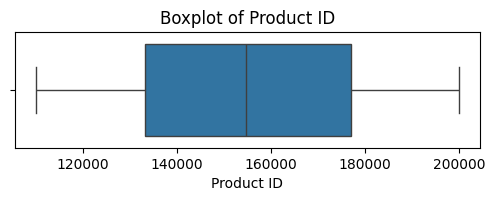

Price: 0 outlier(s)


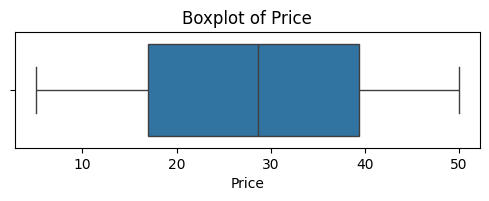

Competitor's Price: 0 outlier(s)


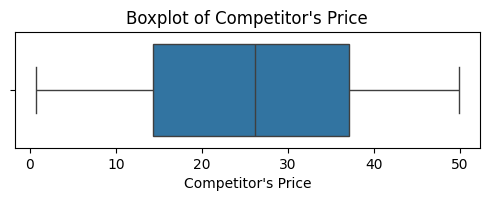

Sales Volume: 0 outlier(s)


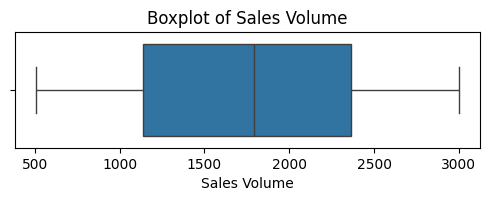

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Cek outlier dengan metode IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"{col}: {len(outliers)} outlier(s)")

    # Plot boxplot untuk visualisasi
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

### 5.Mengecek Baris Duplikat

In [ ]:
#buat cek baris duplikat
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()

print(f"Jumlah baris duplikat: {num_duplicates}")

#kalo mau diliat isinya
if num_duplicates > 0:
    print("\nBaris duplikat:")
    display(df[duplicate_rows])

Jumlah baris duplikat: 0


### 6.Univariate

Univariate artinya "satu variabel". Jadi, analisis univariat adalah proses menganalisis dan mendeskripsikan satu variabel saja dalam dataset, tanpa melihat hubungan dengan variabel lain.

analisis univariate digunakan untuk:

-Mengetahui karakteristik dasar dari variabel tersebut.

-Mendeteksi distribusi, outlier, dan ringkasan statistik.

In [ ]:
df.describe()

Product ID        Price  Competitor's Price  Sales Volume
count    1000.000000  1000.000000         1000.000000   1000.000000
mean   154899.862000    28.020010           25.550110   1769.311000
std     25795.563607    13.067876           13.156466    718.386603
min    110033.000000     5.060000            0.720000    507.000000
25%    133164.500000    16.917500           14.277500   1136.500000
50%    154694.500000    28.680000           26.145000   1791.500000
75%    176954.250000    39.332500           37.125000   2363.750000
max    199976.000000    49.980000           49.850000   2999.000000

In [ ]:
df.describe(include='category')

Product Position Promotion Foot Traffic Consumer Demographics  \
count              1000      1000         1000                  1000   
unique                3         2            3                     4   
top             End-cap        No         High              Families   
freq                342       528          340                   263   

       Product Category Seasonal  
count              1000     1000  
unique                3        2  
top            Clothing      Yes  
freq                338      505

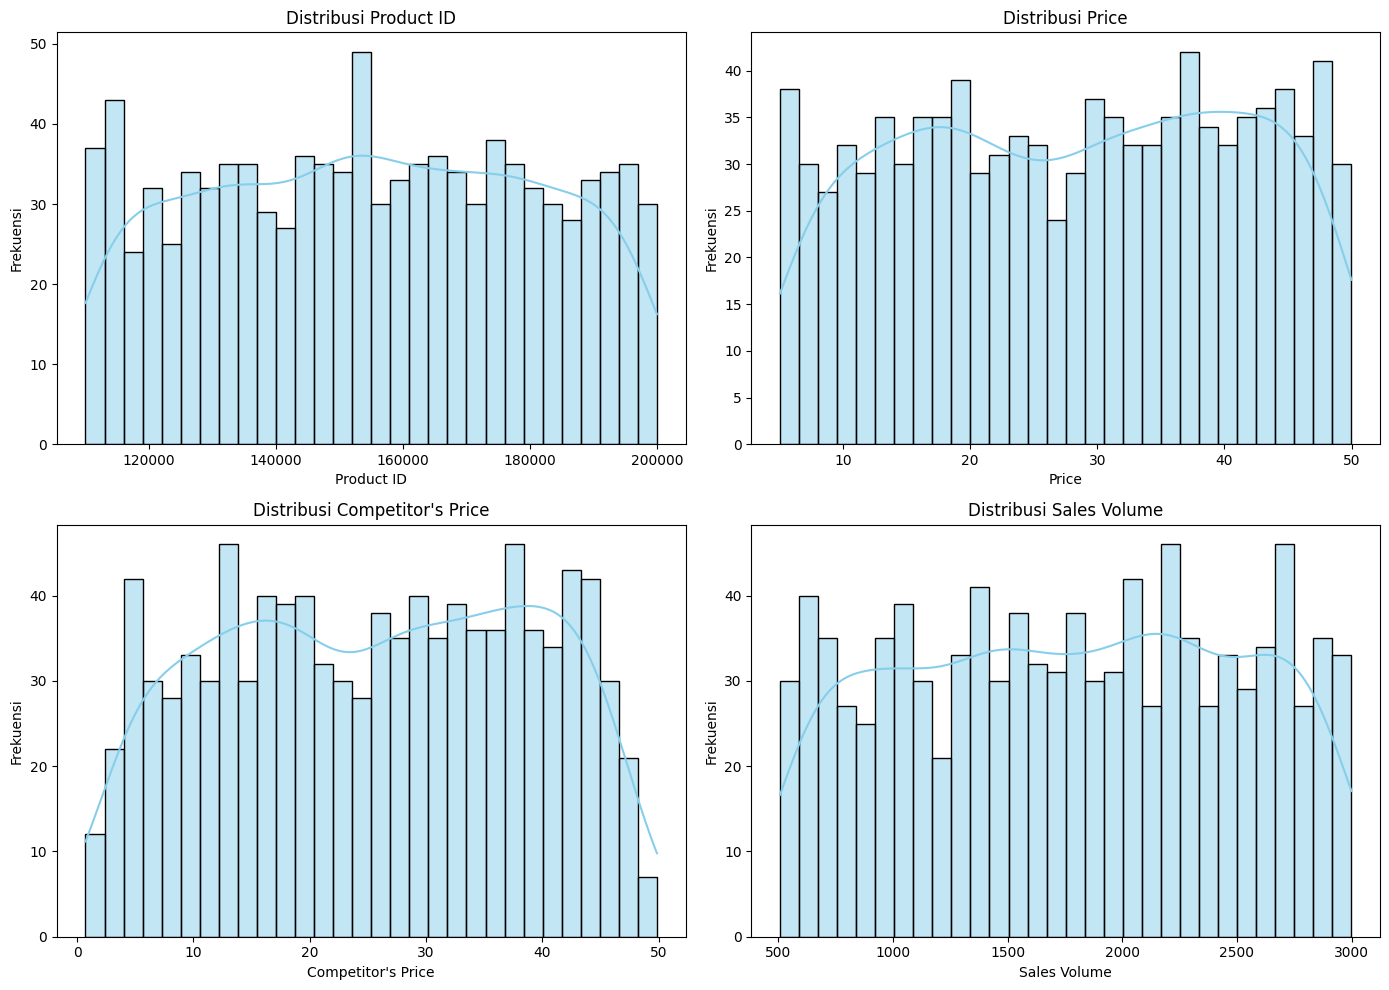

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot distribusi
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

### 7.Bivariate

Bivariate = "dua variabel".
Analisis bivariate digunakan untuk memahami hubungan antara dua variabel, baik keduanya numerik, atau kombinasi numerik dan kategori.

bivariate digunakan untuk:

-Mengetahui apakah dua variabel saling terkait.

-Mendeteksi pola hubungan, korelasi, atau perbedaan antar kelompok.


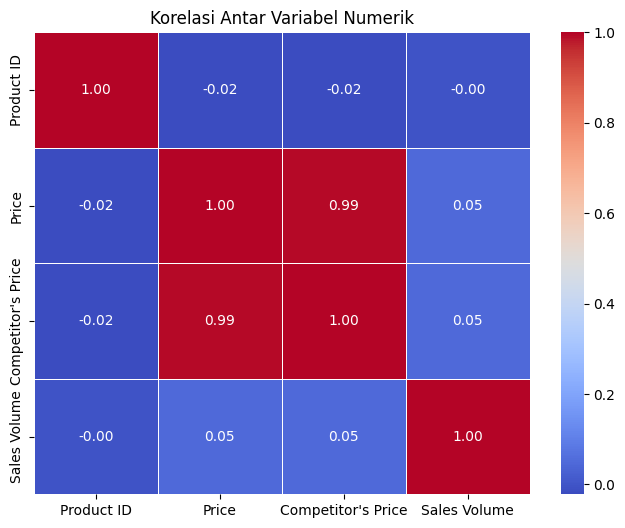

In [ ]:
# Pilih kolom numerik
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# itung matriks korelasi
corr_matrix = numeric_cols.corr()

# nampilin korelasi pake bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antar Variabel Numerik")
plt.show()

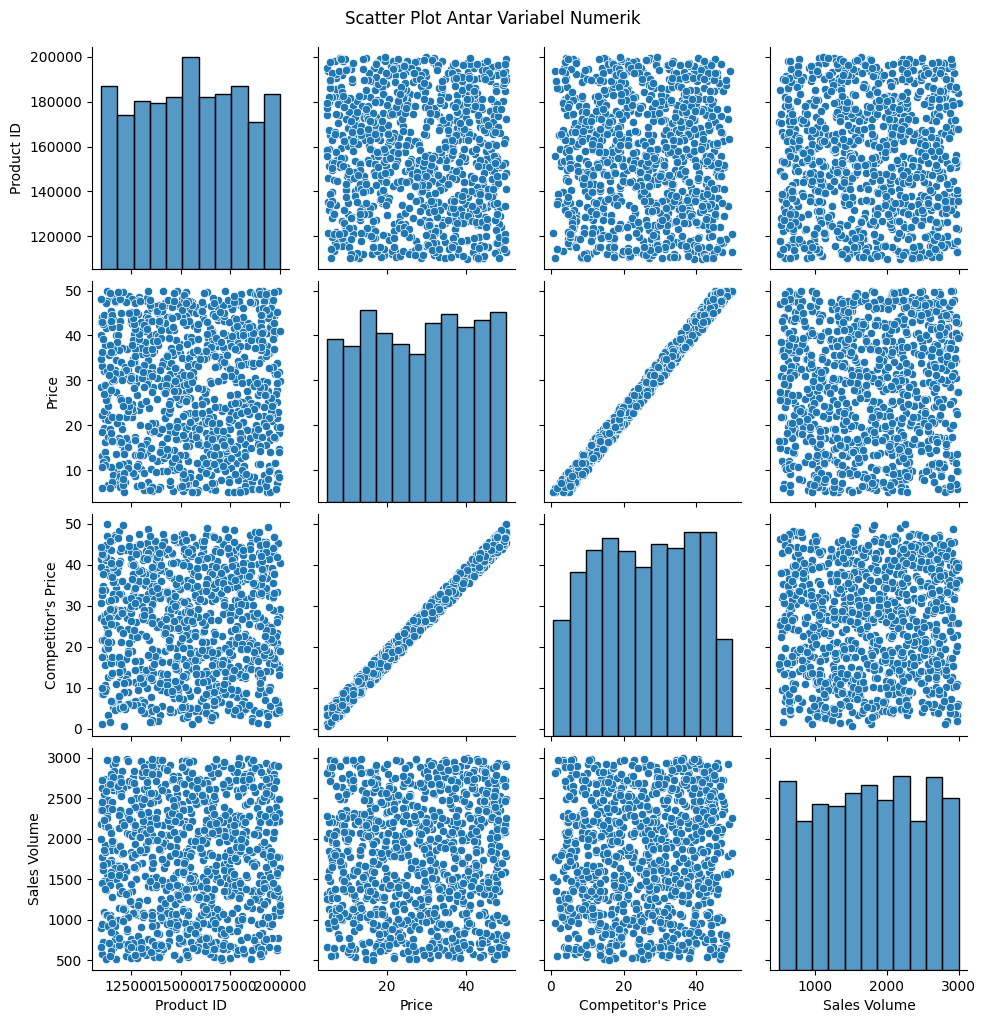

In [ ]:
# Ambil kolom numerik aja
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Buat pairplot untuk semua pasangan variabel numerik
sns.pairplot(numeric_cols)
plt.suptitle("Scatter Plot Antar Variabel Numerik", y=1.02)
plt.show()

### 8.Multivariate

Multivariat = "lebih dari dua variabel".
Analisis multivariat digunakan untuk memahami hubungan kompleks antara tiga atau lebih variabel dalam satu waktu.

Multivariate berfungsi:

Melihat interaksi antar banyak variabel.

Menjelaskan atau memprediksi satu variabel berdasarkan variabel lain (misalnya, prediksi Sales Volume dari Price, Promotion, dll).

Mengurangi dimensi data, misalnya dalam visualisasi atau klasterisasi.

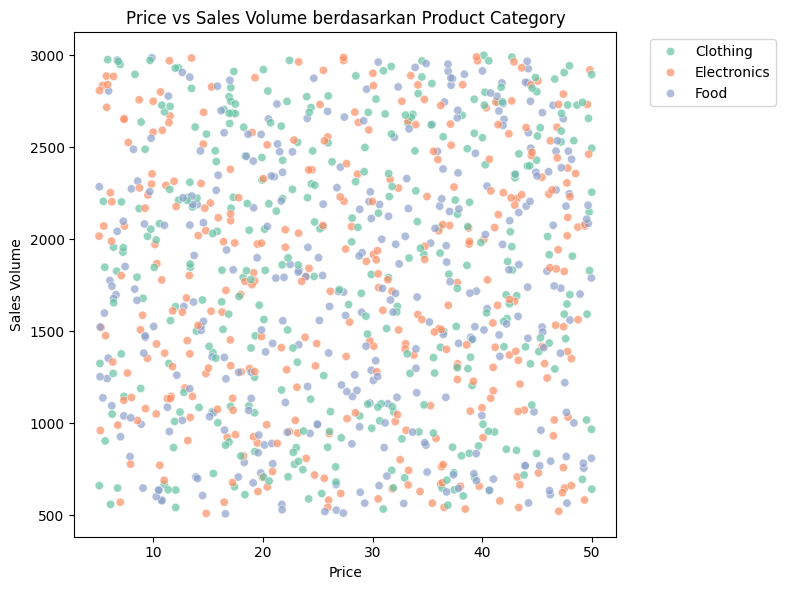

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Price',
    y='Sales Volume',
    hue='Product Category',
    palette='Set2',
    alpha=0.7
)
plt.title('Price vs Sales Volume berdasarkan Product Category')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

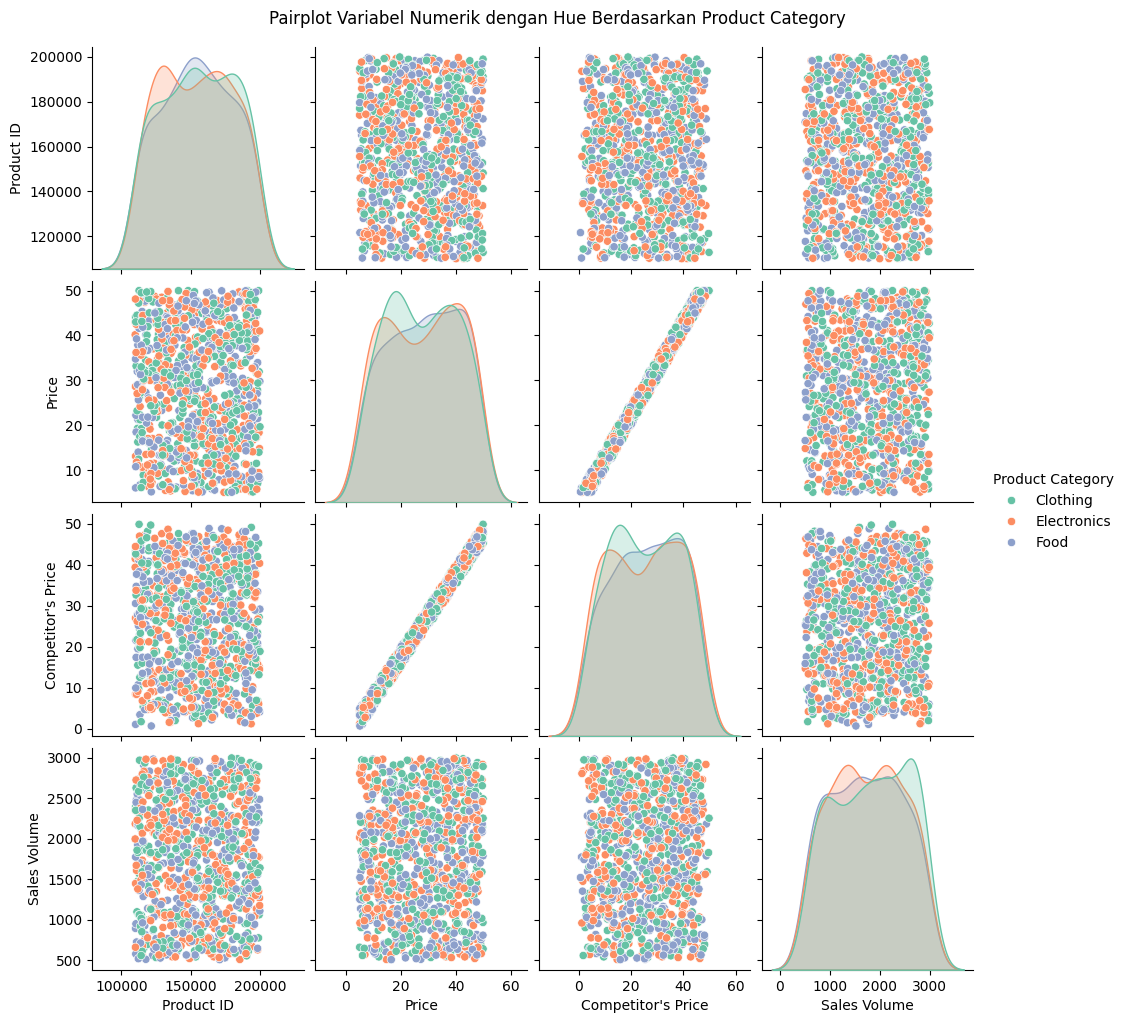

In [ ]:
# Pastiin kolom kategori bertipe 'category'
df['Product Category'] = df['Product Category'].astype('category')

# Ambil kolom numerik
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Buat pairplot pake hue berdasarkan kategori produk
sns.pairplot(df[numeric_cols.tolist() + ['Product Category']], hue='Product Category', palette='Set2')
plt.suptitle("Pairplot Variabel Numerik dengan Hue Berdasarkan Product Category", y=1.02)
plt.show()

## **Pre-processing: Data Cleaning - Aliya Nabila Shufa & Daffa Alif Ruriyanto**

### 1.Remove Duplicates

In [ ]:
print("jumlah data sebelum remove duplicates:", df.shape[0])
df = df.drop_duplicates()
print("jumlah data setelah remove duplicates:", df.shape[0])
df

jumlah data sebelum remove duplicates: 1000
jumlah data setelah remove duplicates: 1000


Product ID Product Position  Price  Competitor's Price Promotion  \
0        185102            Aisle  17.07               16.16        No   
1        188771            Aisle  17.41               13.13        No   
2        180176          End-cap  43.16               38.37       Yes   
3        112917            Aisle  42.26               38.98       Yes   
4        192936          End-cap  47.94               45.59        No   
..          ...              ...    ...                 ...       ...   
995      162658          End-cap  11.56                8.61        No   
996      146858   Front of Store  47.72               46.78        No   
997      174565            Aisle  21.30               18.71       Yes   
998      160629            Aisle  22.82               19.13        No   
999      150654          End-cap   6.38                5.25       Yes   

    Foot Traffic Consumer Demographics Product Category Seasonal  Sales Volume  
0         Medium              Families         Clothing       No          2823  
1            Low               Seniors         Clothing       No           654  
2         Medium          Young adults      Electronics      Yes          2220  
3            Low              Families         Clothing      Yes          1568  
4         Medium      College students         Clothing      Yes          2942  
..           ...                   ...              ...      ...           ...  
995       Medium              Families      Electronics      Yes          1133  
996       Medium      College students             Food      Yes           565  
997         High               Seniors      Electronics       No           890  
998       Medium               Seniors      Electronics      Yes          2538  
999       Medium          Young adults      Electronics       No          2884  

[1000 rows x 10 columns]

- Dapat dilihat bahwa jumlah data sebelum dan sesudah remove duplicates **sama** maka data tersebut **tidak** terdapat duplicates data.
- Diperlukannya remove duplicate untuk memastikan data lebih bersih dari duplicate dan data busa saja berubah selama proses preparation.

###2.Detect and remove outliers

In [ ]:
from scipy import stats
numeric_cols = ["Price", "Competitor\'s Price", "Sales Volume"]
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df = df[(z_scores<3).all(axis=1)]
print("data setelah remove outliers:", df.shape)
df

data setelah remove outliers: (1000, 10)


Product ID Product Position  Price  Competitor's Price Promotion  \
0        185102            Aisle  17.07               16.16        No   
1        188771            Aisle  17.41               13.13        No   
2        180176          End-cap  43.16               38.37       Yes   
3        112917            Aisle  42.26               38.98       Yes   
4        192936          End-cap  47.94               45.59        No   
..          ...              ...    ...                 ...       ...   
995      162658          End-cap  11.56                8.61        No   
996      146858   Front of Store  47.72               46.78        No   
997      174565            Aisle  21.30               18.71       Yes   
998      160629            Aisle  22.82               19.13        No   
999      150654          End-cap   6.38                5.25       Yes   

    Foot Traffic Consumer Demographics Product Category Seasonal  Sales Volume  
0         Medium              Families         Clothing       No          2823  
1            Low               Seniors         Clothing       No           654  
2         Medium          Young adults      Electronics      Yes          2220  
3            Low              Families         Clothing      Yes          1568  
4         Medium      College students         Clothing      Yes          2942  
..           ...                   ...              ...      ...           ...  
995       Medium              Families      Electronics      Yes          1133  
996       Medium      College students             Food      Yes           565  
997         High               Seniors      Electronics       No           890  
998       Medium               Seniors      Electronics      Yes          2538  
999       Medium          Young adults      Electronics       No          2884  

[1000 rows x 10 columns]

- zscore() digunakan untuk menghitung standard score dari setiap nilai terhadap datanya dan kelebihan zscore juga mudah+cepat, tidak perlu plot manual dan cocok untuk dataset yang besar dan bersih gitu.
- Hasilnya data tetap 1000 baris maka tidak ada baris yang terhapus, artinya 0 outliers.



###3.Remove Irrelevant data


In [ ]:
irrelevant_cols = ["Product ID", "Notes"]
df = df.drop(columns=[col for col in irrelevant_cols if col in df.columns])
df

Product Position  Price  Competitor's Price Promotion Foot Traffic  \
0              Aisle  17.07               16.16        No       Medium   
1              Aisle  17.41               13.13        No          Low   
2            End-cap  43.16               38.37       Yes       Medium   
3              Aisle  42.26               38.98       Yes          Low   
4            End-cap  47.94               45.59        No       Medium   
..               ...    ...                 ...       ...          ...   
995          End-cap  11.56                8.61        No       Medium   
996   Front of Store  47.72               46.78        No       Medium   
997            Aisle  21.30               18.71       Yes         High   
998            Aisle  22.82               19.13        No       Medium   
999          End-cap   6.38                5.25       Yes       Medium   

    Consumer Demographics Product Category Seasonal  Sales Volume  
0                Families         Clothing       No          2823  
1                 Seniors         Clothing       No           654  
2            Young adults      Electronics      Yes          2220  
3                Families         Clothing      Yes          1568  
4        College students         Clothing      Yes          2942  
..                    ...              ...      ...           ...  
995              Families      Electronics      Yes          1133  
996      College students             Food      Yes           565  
997               Seniors      Electronics       No           890  
998               Seniors      Electronics      Yes          2538  
999          Young adults      Electronics       No          2884  

[1000 rows x 9 columns]

- Remove irrelevant data untuk mengurangi noise dalam data, jadi tidak terdapat kolom yang dianggap tidak penting tidak penting saat melakukan modeling.
- kenapa product ID di sebut irrelevant data? karena kolom tersebut tidak punya nilai prediktif.
- Notes untuk kolom catatan tidak dipakai dalam model.

###4.Standardize capitalization

In [ ]:
for col in df.select_dtypes(include="object").columns:
  df[col] = df[col].str.strip().str.title()
df

Product Position  Price  Competitor's Price Promotion Foot Traffic  \
0              Aisle  17.07               16.16        No       Medium   
1              Aisle  17.41               13.13        No          Low   
2            End-cap  43.16               38.37       Yes       Medium   
3              Aisle  42.26               38.98       Yes          Low   
4            End-cap  47.94               45.59        No       Medium   
..               ...    ...                 ...       ...          ...   
995          End-cap  11.56                8.61        No       Medium   
996   Front of Store  47.72               46.78        No       Medium   
997            Aisle  21.30               18.71       Yes         High   
998            Aisle  22.82               19.13        No       Medium   
999          End-cap   6.38                5.25       Yes       Medium   

    Consumer Demographics Product Category Seasonal  Sales Volume  
0                Families         Clothing       No          2823  
1                 Seniors         Clothing       No           654  
2            Young adults      Electronics      Yes          2220  
3                Families         Clothing      Yes          1568  
4        College students         Clothing      Yes          2942  
..                    ...              ...      ...           ...  
995              Families      Electronics      Yes          1133  
996      College students             Food      Yes           565  
997               Seniors      Electronics       No           890  
998               Seniors      Electronics      Yes          2538  
999          Young adults      Electronics       No          2884  

[1000 rows x 9 columns]

- Standardize capitalization digunakan untuk menghindari error saat memproses string sehingga data lebih konsisten dan mudah diolah saat pemodelan.

###5.Convert Data Type

In [ ]:
df['Promotion'] = df['Promotion'].replace({'Yes': True, 'No': False})
df['Seasonal'] = df['Seasonal'].replace({'Yes': True, 'No': False})

df

<ipython-input-92-5b1194356982>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Promotion'] = df['Promotion'].replace({'Yes': True, 'No': False})
<ipython-input-92-5b1194356982>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Promotion'] = df['Promotion'].replace({'Yes': True, 'No': False})
<ipython-input-92-5b1194356982>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior

Product Position  Price  Competitor's Price Promotion Foot Traffic  \
0              Aisle  17.07               16.16     False       Medium   
1              Aisle  17.41               13.13     False          Low   
2            End-cap  43.16               38.37      True       Medium   
3              Aisle  42.26               38.98      True          Low   
4            End-cap  47.94               45.59     False       Medium   
..               ...    ...                 ...       ...          ...   
995          End-cap  11.56                8.61     False       Medium   
996   Front of Store  47.72               46.78     False       Medium   
997            Aisle  21.30               18.71      True         High   
998            Aisle  22.82               19.13     False       Medium   
999          End-cap   6.38                5.25      True       Medium   

    Consumer Demographics Product Category Seasonal  Sales Volume  
0                Families         Clothing    False          2823  
1                 Seniors         Clothing    False           654  
2            Young adults      Electronics     True          2220  
3                Families         Clothing     True          1568  
4        College students         Clothing     True          2942  
..                    ...              ...      ...           ...  
995              Families      Electronics     True          1133  
996      College students             Food     True           565  
997               Seniors      Electronics    False           890  
998               Seniors      Electronics     True          2538  
999          Young adults      Electronics    False          2884  

[1000 rows x 9 columns]

* Convert data type Promotion dan Seasonal dari category menjadi nilai boolean

* Kenapa? Karena nilai boolean lebih efisien untuk perhitungan dan analitik untuk kedepannya

### 6.Clear Formatting

In [ ]:
df.reset_index(drop=True, inplace=True)

* return type: Mengembalikan DataFrame baru dengan indeks yang baru.

* drop: Jika diatur ke True, indeks lama dibuang daripada ditambahkan sebagai kolom.

* inplace: Jika diatur ke True, operasi mengubah DataFrame yang ada tanpa mengembalikan yang baru.

In [ ]:
df.columns = df.columns.str.strip()  # Menghapus spasi di awal/akhir
df.columns = df.columns.str.replace(" ", "_")  # Mengganti spasi " " dengan garis bawah "_"

Clean Column name

## **Pre-processing: EDA Before Feature Engineering thingy - Bisma Riefky Alfarizaldo Bachtiar**

###Help Data Cleaning a bit

In [ ]:
# benerin nama kolom competitor's price
df.columns = df.columns.str.replace("'", "")
# df["Competitor's_Price"] = df["Competitor's_Price"].str.replace

###Recap Informasi Data

In [ ]:
df.describe(include='all').T

count unique       top freq      mean         std  \
Product_Position         1000      3   End-cap  342       NaN         NaN   
Price                  1000.0    NaN       NaN  NaN  28.02001   13.067876   
Competitors_Price      1000.0    NaN       NaN  NaN  25.55011   13.156466   
Promotion                1000      2     False  528       NaN         NaN   
Foot_Traffic             1000      3      High  340       NaN         NaN   
Consumer_Demographics    1000      4  Families  263       NaN         NaN   
Product_Category         1000      3  Clothing  338       NaN         NaN   
Seasonal                 1000      2      True  505       NaN         NaN   
Sales_Volume           1000.0    NaN       NaN  NaN  1769.311  718.386603   

                         min      25%     50%      75%     max  
Product_Position         NaN      NaN     NaN      NaN     NaN  
Price                   5.06  16.9175   28.68  39.3325   49.98  
Competitors_Price       0.72  14.2775  26.145   37.125   49.85  
Promotion                NaN      NaN     NaN      NaN     NaN  
Foot_Traffic             NaN      NaN     NaN      NaN     NaN  
Consumer_Demographics    NaN      NaN     NaN      NaN     NaN  
Product_Category         NaN      NaN     NaN      NaN     NaN  
Seasonal                 NaN      NaN     NaN      NaN     NaN  
Sales_Volume           507.0   1136.5  1791.5  2363.75  2999.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Product_Position       1000 non-null   category
 1   Price                  1000 non-null   float64 
 2   Competitors_Price      1000 non-null   float64 
 3   Promotion              1000 non-null   category
 4   Foot_Traffic           1000 non-null   category
 5   Consumer_Demographics  1000 non-null   category
 6   Product_Category       1000 non-null   category
 7   Seasonal               1000 non-null   category
 8   Sales_Volume           1000 non-null   int64   
dtypes: category(6), float64(2), int64(1)
memory usage: 30.2 KB


In [ ]:
# Periksa DataFrame dalam Format Tabel
from google.colab import data_table
data_table.DataTable(df) # Menampilkan DataFrame dalam bentuk tabel interaktif yang bisa di-scroll, di-sort, dan di-filter di Google Colab.

###Scatter Plot masing-masing Category

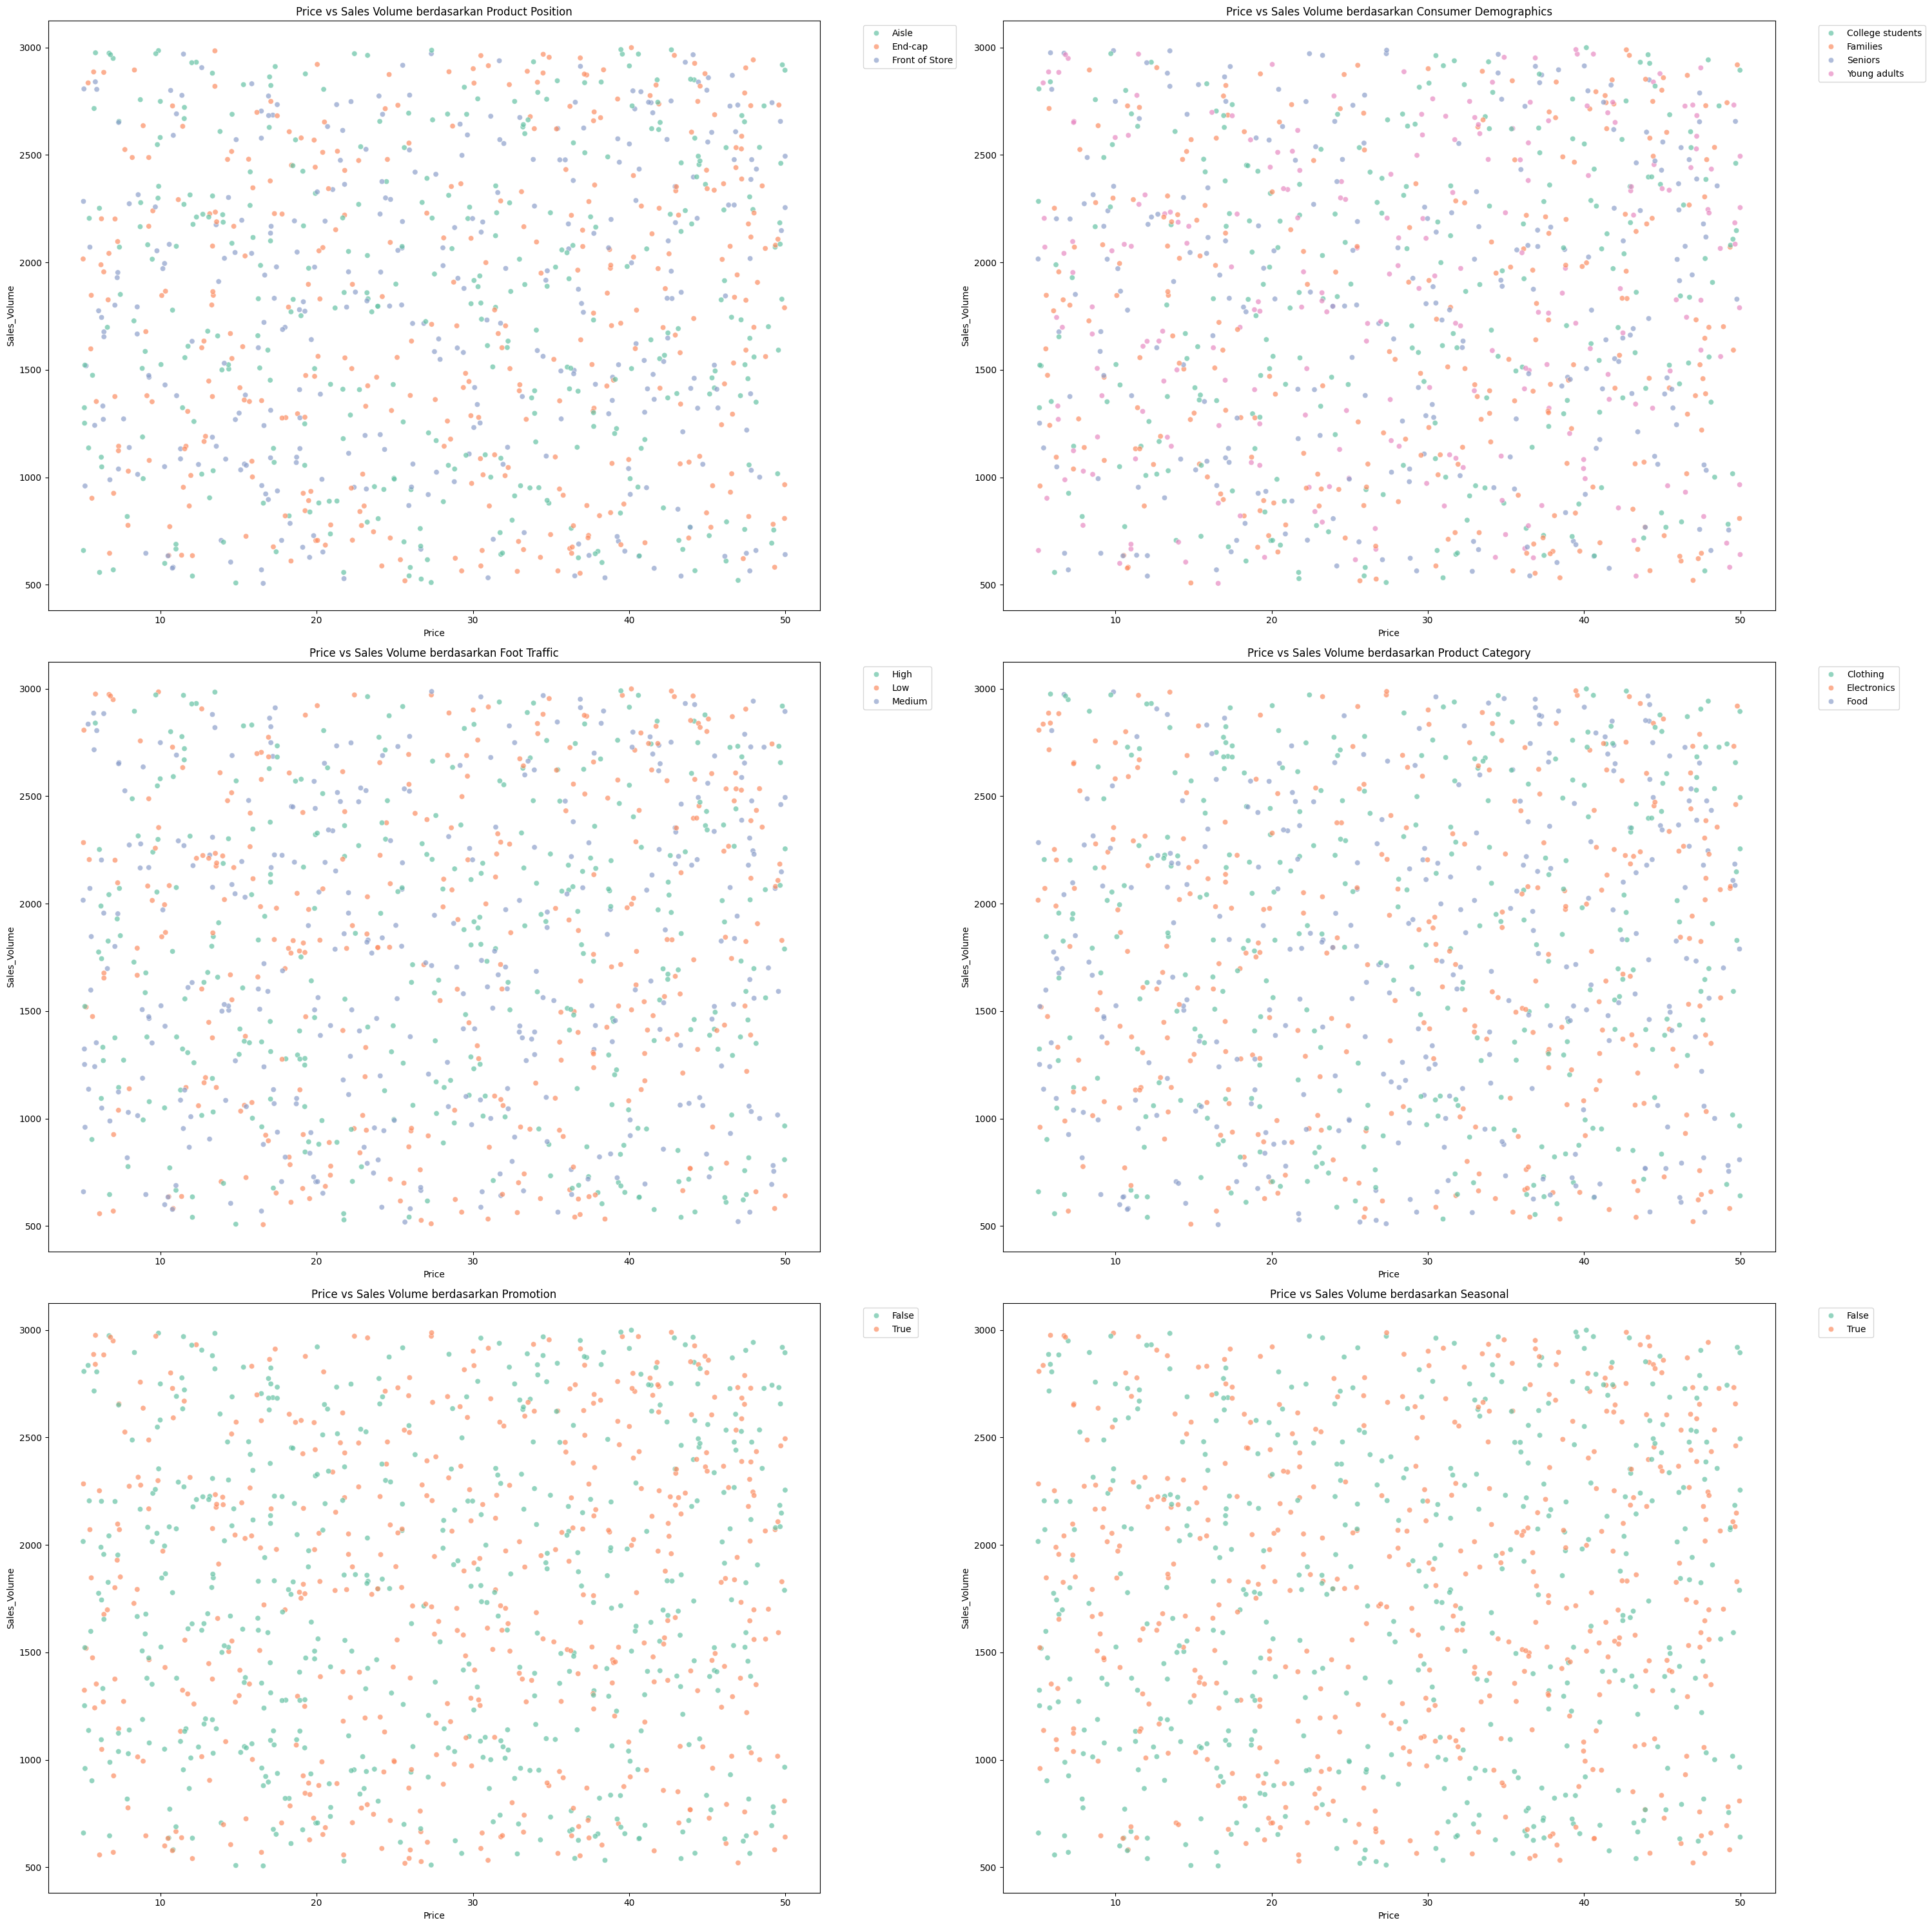

In [ ]:
# Visualisasi Scatter Plot untuk semua category
plt.figure(figsize=(30, 30))

# Scatter plot untuk category product position
plt.subplot(3, 2, 1)  # 2 baris, 2 kolom, posisi ke-1
sns.scatterplot(
    data=df,
    x='Price',
    y='Sales_Volume',
    hue='Product_Position',
    palette='Set2',
    alpha=0.7
)
plt.title('Price vs Sales Volume berdasarkan Product Position')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Scatter plot untuk category Consumer_Demographics
plt.subplot(3, 2, 2)
sns.scatterplot(
    data=df,
    x='Price',
    y='Sales_Volume',
    hue='Consumer_Demographics',
    palette='Set2',
    alpha=0.7
)
plt.title('Price vs Sales Volume berdasarkan Consumer Demographics')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Scatter plot untuk category foot traffic
plt.subplot(3, 2, 3)
sns.scatterplot(
    data=df,
    x='Price',
    y='Sales_Volume',
    hue='Foot_Traffic',
    palette='Set2',
    alpha=0.7
)
plt.title('Price vs Sales Volume berdasarkan Foot Traffic')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Scatter plot untuk category Product_Category
plt.subplot(3, 2, 4)
sns.scatterplot(
    data=df,
    x='Price',
    y='Sales_Volume',
    hue='Product_Category',
    palette='Set2',
    alpha=0.7
)
plt.title('Price vs Sales Volume berdasarkan Product Category')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Scatter plot untuk category Promotion
plt.subplot(3, 2, 5)
sns.scatterplot(
    data=df,
    x='Price',
    y='Sales_Volume',
    hue='Promotion',
    palette='Set2',
    alpha=0.7
)
plt.title('Price vs Sales Volume berdasarkan Promotion')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Scatter plot untuk category Seasonal
plt.subplot(3, 2, 6)
sns.scatterplot(
    data=df,
    x='Price',
    y='Sales_Volume',
    hue='Seasonal',
    palette='Set2',
    alpha=0.7
)
plt.title('Price vs Sales Volume berdasarkan Seasonal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

###Bar Plot masing-masing Category

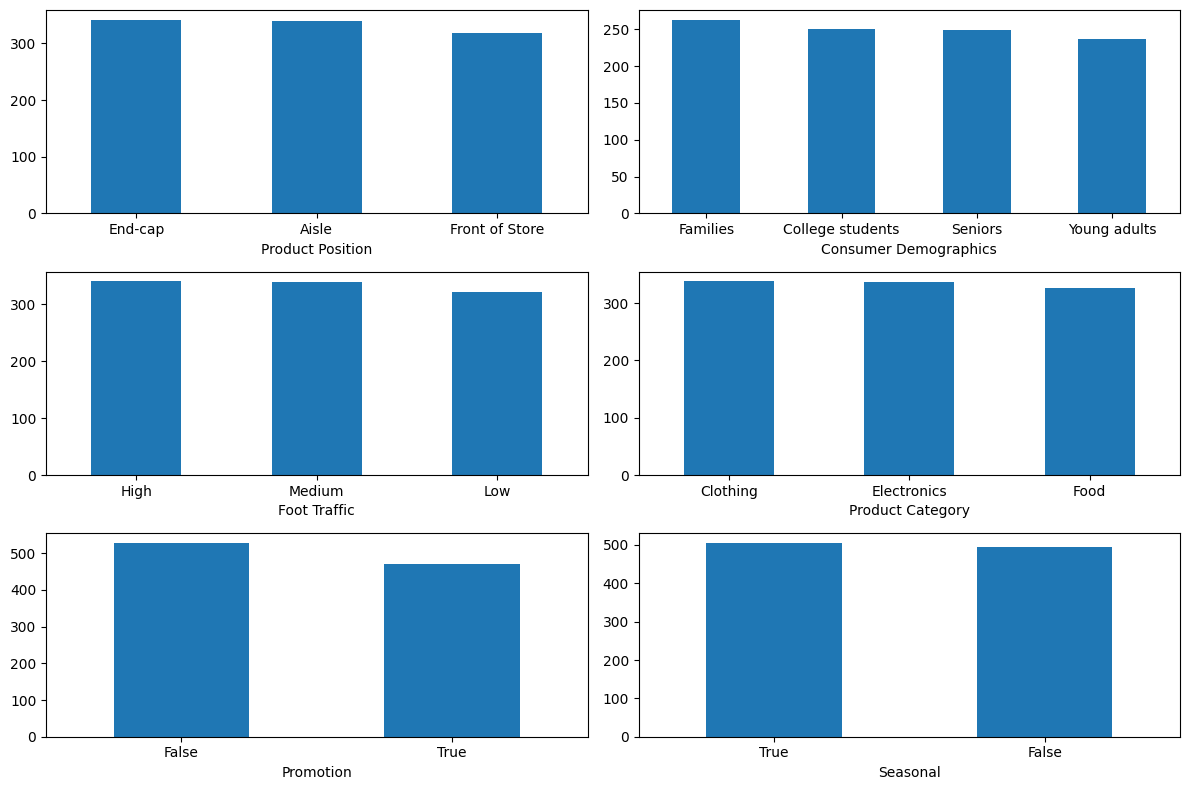

In [ ]:
# Visualisasi Bar Plot untuk semua category
plt.figure(figsize=(12, 8))

# Bar plot untuk category product position
plt.subplot(3, 2, 1)  # 2 baris, 2 kolom, posisi ke-1
df['Product_Position'].value_counts().plot(kind='bar', xlabel='Product Position', rot=0)

# Bar plot untuk category Consumer_Demographics
plt.subplot(3, 2, 2)
df['Consumer_Demographics'].value_counts().plot(kind='bar', xlabel='Consumer Demographics', rot=0)

# Bar plot untuk category foot traffic
plt.subplot(3, 2, 3)
df['Foot_Traffic'].value_counts().plot(kind='bar', xlabel='Foot Traffic', rot=0)

# Bar plot untuk category Product_Category
plt.subplot(3, 2, 4)
df['Product_Category'].value_counts().plot(kind='bar', xlabel='Product Category', rot=0)

# Bar plot untuk category Promotion
plt.subplot(3, 2, 5)
df['Promotion'].value_counts().plot(kind='bar', xlabel='Promotion', rot=0)

# Bar plot untuk category Seasonal
plt.subplot(3, 2, 6)
df['Seasonal'].value_counts().plot(kind='bar', xlabel='Seasonal', rot=0)

plt.tight_layout()
plt.show()

###Bar Plot masing-masing Category VS Sales Volume

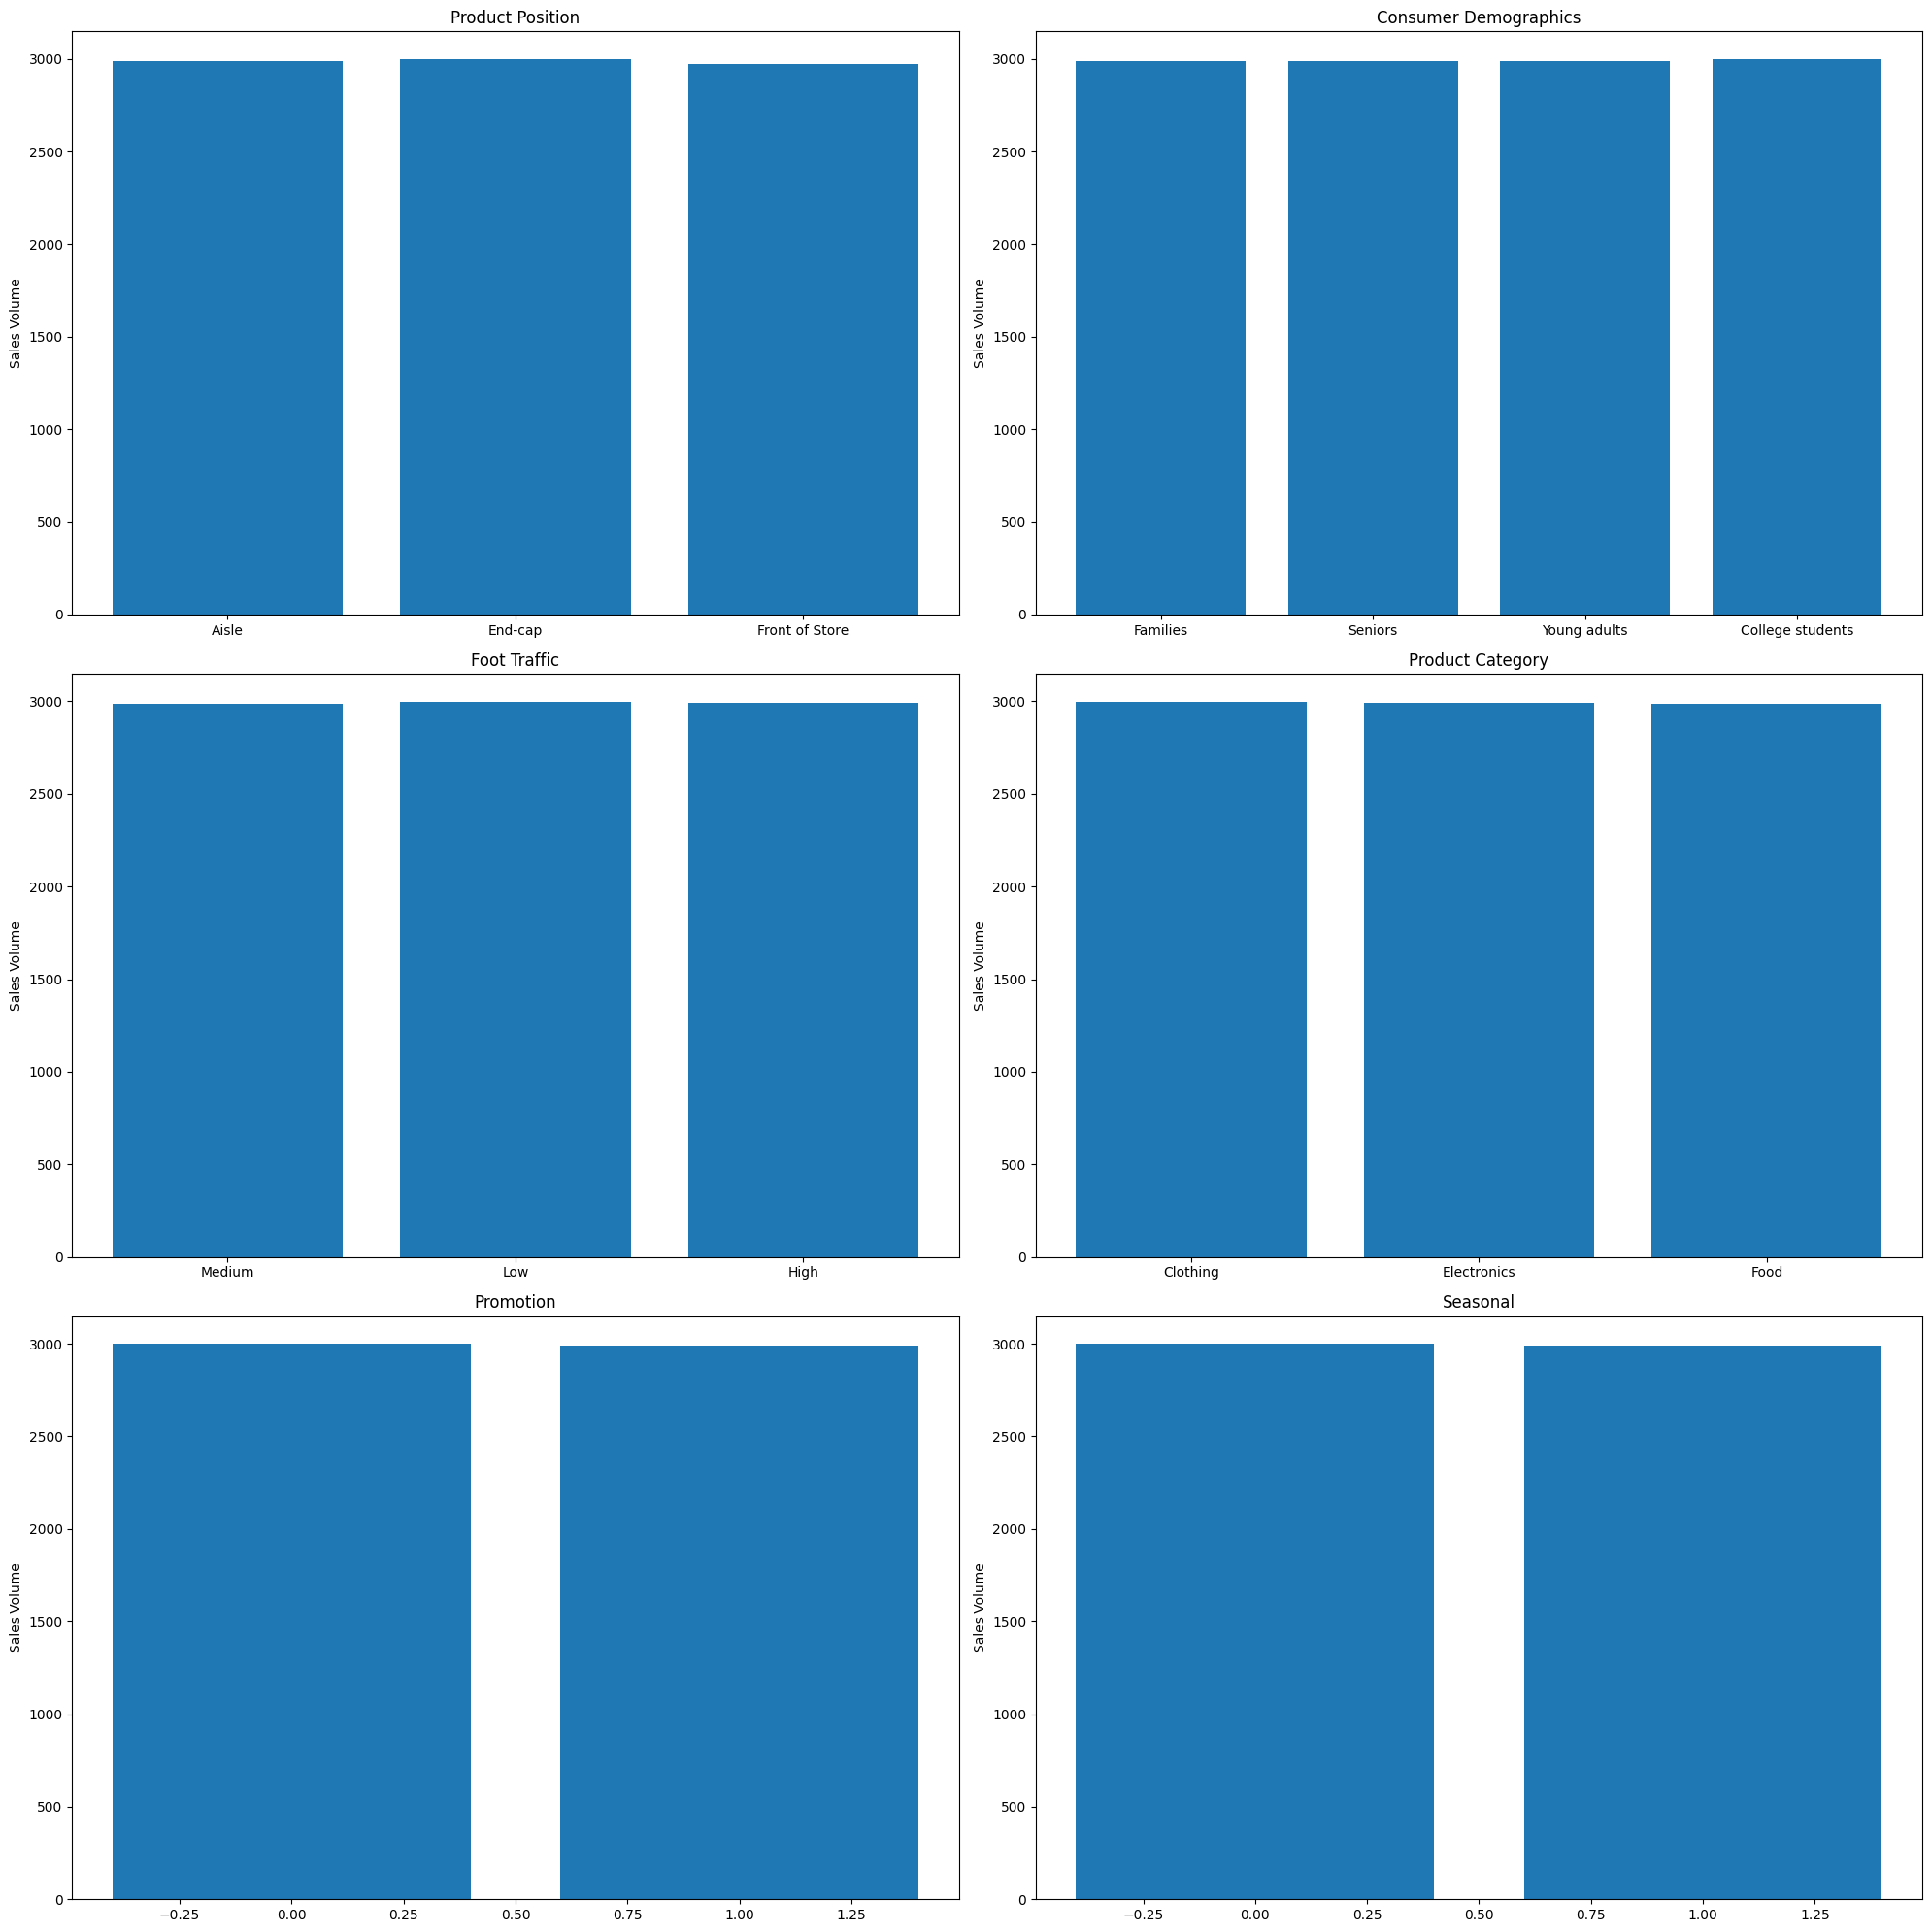

In [ ]:
# Visualisasi Bar Plot untuk semua category
plt.figure(figsize=(20, 20))

# Bar plot untuk category product position
plt.subplot(3, 2, 1)  # 2 baris, 2 kolom, posisi ke-1
plt.bar(df['Product_Position'], df['Sales_Volume'])
plt.title("Product Position")
plt.ylabel('Sales Volume')

# Bar plot untuk category Consumer_Demographics
plt.subplot(3, 2, 2)
plt.bar(df['Consumer_Demographics'], df['Sales_Volume'])
plt.title("Consumer Demographics")
plt.ylabel('Sales Volume')

# Bar plot untuk category foot traffic
plt.subplot(3, 2, 3)
plt.bar(df['Foot_Traffic'], df['Sales_Volume'])
plt.title("Foot Traffic")
plt.ylabel('Sales Volume')

# Bar plot untuk category Product_Category
plt.subplot(3, 2, 4)
plt.bar(df['Product_Category'], df['Sales_Volume'])
plt.title("Product Category")
plt.ylabel('Sales Volume')

# Bar plot untuk category Promotion
plt.subplot(3, 2, 5)
plt.bar(df['Promotion'], df['Sales_Volume'])
plt.title("Promotion")
plt.ylabel('Sales Volume')

# Bar plot untuk category Seasonal
plt.subplot(3, 2, 6)
plt.bar(df['Seasonal'], df['Sales_Volume'])
plt.title("Seasonal")
plt.ylabel('Sales Volume')

plt.tight_layout()
plt.show()

###Bar Plot Category VS Total Sales Volume

<ipython-input-102-711e2810c954>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Product_Position')['Sales_Volume'].sum().plot(kind='bar')
<ipython-input-102-711e2810c954>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Consumer_Demographics')['Sales_Volume'].sum().plot(kind='bar')
<ipython-input-102-711e2810c954>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Foot_Traffic')['Sal

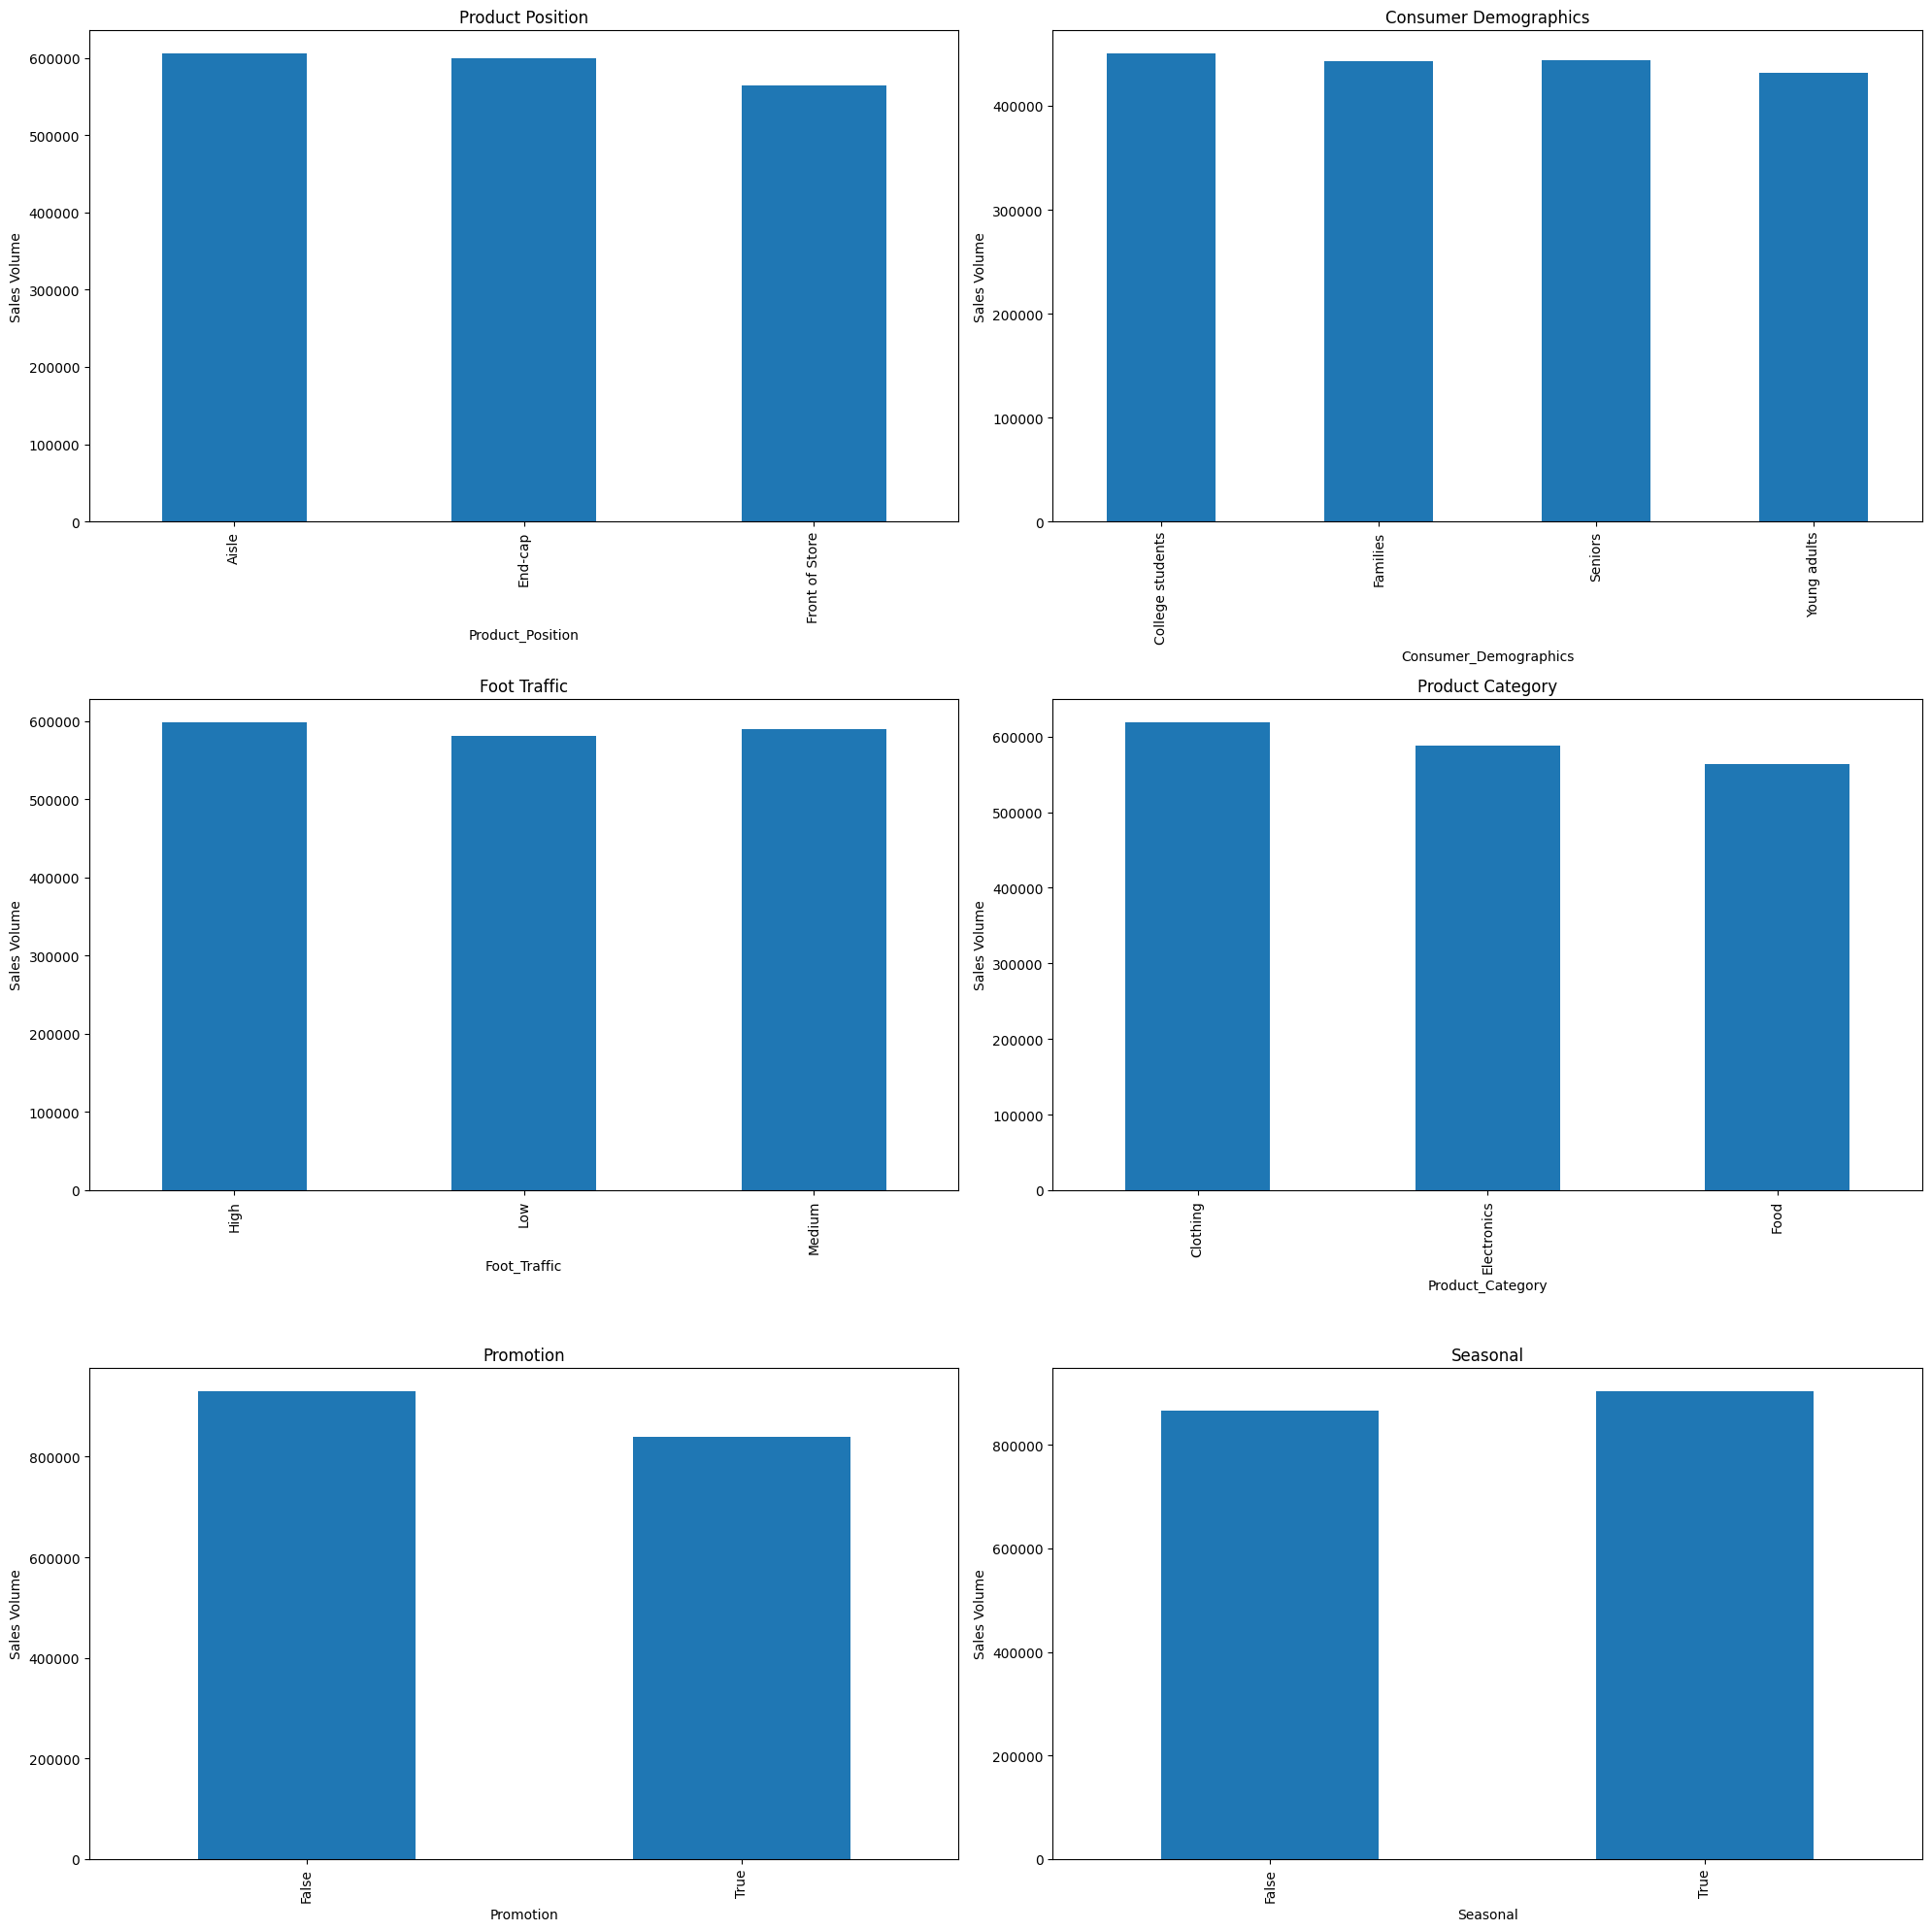

In [ ]:
# Visualisasi Bar Plot untuk semua category
plt.figure(figsize=(20, 20))

# Bar plot untuk category product position
plt.subplot(3, 2, 1)  # 2 baris, 2 kolom, posisi ke-1
df.groupby('Product_Position')['Sales_Volume'].sum().plot(kind='bar')
plt.title("Product Position")
plt.ylabel('Sales Volume')

# Bar plot untuk category Consumer_Demographics
plt.subplot(3, 2, 2)
df.groupby('Consumer_Demographics')['Sales_Volume'].sum().plot(kind='bar')
plt.title("Consumer Demographics")
plt.ylabel('Sales Volume')

# Bar plot untuk category foot traffic
plt.subplot(3, 2, 3)
df.groupby('Foot_Traffic')['Sales_Volume'].sum().plot(kind='bar')
plt.title("Foot Traffic")
plt.ylabel('Sales Volume')

# Bar plot untuk category Product_Category
plt.subplot(3, 2, 4)
df.groupby('Product_Category')['Sales_Volume'].sum().plot(kind='bar')
plt.title("Product Category")
plt.ylabel('Sales Volume')

# Bar plot untuk category Promotion
plt.subplot(3, 2, 5)
df.groupby('Promotion')['Sales_Volume'].sum().plot(kind='bar')
plt.title("Promotion")
plt.ylabel('Sales Volume')

# Bar plot untuk category Seasonal
plt.subplot(3, 2, 6)
df.groupby('Seasonal')['Sales_Volume'].sum().plot(kind='bar')
plt.title("Seasonal")
plt.ylabel('Sales Volume')

plt.tight_layout()
plt.show()

###Mencoba Filter Data Berdasarkan Category Yang Ada

In [ ]:
# bikin tabel baru yg tampilin per product_category
clothing = df[df['Product_Category'] == 'Clothing']
electronics = df[df['Product_Category'] == 'Electronics']
food = df[df['Product_Category'] == 'Food']

# bikin tabel baru yg tampilin per product_position
aisle = df[df['Product_Position'] == 'Aisle']
endcap = df[df['Product_Position'] == 'End-cap']
front = df[df['Product_Position'] == 'Front of Store']

# bikin tabel baru yg tampilin per Consumer_Demographics
families = df[df['Consumer_Demographics'] == 'Families']
seniors = df[df['Consumer_Demographics'] == 'Seniors']
young = df[df['Consumer_Demographics'] == 'Young adults']
college = df[df['Consumer_Demographics'] == 'College students']

# bikin tabel baru yg tampilin per Foot_Traffic
high = df[df['Foot_Traffic'] == 'High']
low = df[df['Foot_Traffic'] == 'Low']
medium = df[df['Foot_Traffic'] == 'Medium']

'''
# bikin tabel baru yg tampilin per Promotion
falsepro = df[df['Promotion'] == 'false']
truepro = df[df['Promotion'] == 'true']

# bikin tabel baru yg tampilin per Seasonal
falseseason = df[df['Seasonal'] == 'No']
trueseason = df[df['Seasonal'] == 'true']
'''

data_table.DataTable(medium)

###Kesimpulan Sementara

Setelah melihat visualisasi data saat ini, belum ditemukannya korelasi antara data numerik dengan data kategorial. Hal ini terlihat pada Scatter Plot dari masing-masing Category dengan data numerik antara Harga dengan Volume Penjualan. Pada visualisasi tersebut, terlihat bahwa data sangat tersebar luas sehingga pola dari data belum dapat ditemukan. Untuk data numerik, ditunjukkan bahwa harga kompetitor selisih sedikit lebih murah dibandingkan harga toko. Sedangkan untuk data kategorial, tidak adanya signifikansi dari masing-masing kategori. Hal ini bisa dilihat pada Box Plot, tiap sub-kategori memiliki nilai yang hampir sama rata.

Untuk analisis lebih lanjut, saya menunggu adanya campur tangan oleh feature engineering, terutama feature encoding agar data kategorial dapat diolah lebih lanjut (seperti Heat Map, ini membutuhkan encoding data kategorial terlebih dahulu). Dan mungkin selanjutnya bisa dicoba dengan melihat data dari Sales_Volume terendah yakni 507 hingga nilai rata rata yakni 1770 atau bisa 1800 (karena tujuan dari project ini ialah meningkatkan volume penjualan produk).

Menurut saya, data ini terlalu normal :)

## **Pre-processing: Feature Engineering - Irfan Alif Ahmadi & EDA - Bisma**

### Feature Encoding

Feature Encoding adalah salah satu proses pada feature engineering yang berguna untuk mengubah data kategori yang berupa string atau teks menjadi format numerik biasanya menjadi tipe data integer.

Feature Encoding diperlukan karena beberapa model pada algoritma machine learning tidak bisa bekerja langsung dengan data yang berbentuk string atau kategori, jadi data tersebut harus diubah menjadi angka melalui proses encoding.

In [ ]:
df_fe = df.copy()

In [ ]:
df_fe.head(11)

Product_Position  Price  Competitors_Price Promotion Foot_Traffic  \
0             Aisle  17.07              16.16     False       Medium   
1             Aisle  17.41              13.13     False          Low   
2           End-cap  43.16              38.37      True       Medium   
3             Aisle  42.26              38.98      True          Low   
4           End-cap  47.94              45.59     False       Medium   
5           End-cap  34.50              34.34     False       Medium   
6    Front of Store  41.11              40.15      True         High   
7             Aisle  15.75              12.30     False          Low   
8             Aisle  30.07              26.75      True         High   
9             Aisle  38.00              33.38     False         High   
10            Aisle  27.42              22.82      True         High   

   Consumer_Demographics Product_Category Seasonal  Sales_Volume  
0               Families         Clothing    False          2823  
1                Seniors         Clothing    False           654  
2           Young adults      Electronics     True          2220  
3               Families         Clothing     True          1568  
4       College students         Clothing     True          2942  
5                Seniors         Clothing    False          2968  
6       College students         Clothing     True           952  
7       College students         Clothing    False          2421  
8               Families      Electronics     True          1916  
9               Families      Electronics     True           656  
10      College students             Food     True          2663

Berikut dataset yang belum melalui proses encoding, dimana masih terdapat data kategori berupa string

Untuk Feature Encoding sendiri ada berbagai macam jenis, pada dataset kali ini kita akan menggunakan feature encoding dengan jenis label encoding, dikarenakan pada kolom Foot_Traffic terdapat data kategori yang memiliki hubungan ordinal (Low, Medium, High) dan jumlah kolom yang berupa data kategori juga banyak, sehingga penggunaan label encoding lebih sesuai.

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_fe['Product_Position'] = encoder.fit_transform(df_fe['Product_Position'])
df_fe['Promotion'] = encoder.fit_transform(df_fe['Promotion'])

# Mapping manual
foot_traffic_map = {'Low': 0, 'Medium': 1, 'High': 2}
df_fe['Foot_Traffic'] = df_fe['Foot_Traffic'].map(foot_traffic_map)

df_fe['Consumer_Demographics'] = encoder.fit_transform(df_fe['Consumer_Demographics'])
df_fe['Product_Category'] = encoder.fit_transform(df_fe['Product_Category'])
df_fe['Seasonal'] = encoder.fit_transform(df_fe['Seasonal'])

Pada label encoding, data kategori pada kolom otomatis diubah menjadi angka yang dimulai dari angka 0 dan pengonversian dari huruf ke angkanya dimulai dari urutan huruf alfabet yang terdapat pada data kategori, (misal pada kolom Product_Position terdapat data kategori Aisle, End-cap dan Front of Store, maka setelah diencoding data kategori Aisle berubah menjadi 0, End-cap menjadi 1 dan Front of Store menjadi 2).

Kecuali pada kolom Foot_Traffic yang mana pada kolom tersebut terdapat data kategori yang memiliki hubungan ordinal, sehingga dimapping manual sesuai ordinalnya agar lebih mudah dipahami.

In [ ]:
df_fe.head(11)

Product_Position  Price  Competitors_Price  Promotion Foot_Traffic  \
0                  0  17.07              16.16          0            1   
1                  0  17.41              13.13          0            0   
2                  1  43.16              38.37          1            1   
3                  0  42.26              38.98          1            0   
4                  1  47.94              45.59          0            1   
5                  1  34.50              34.34          0            1   
6                  2  41.11              40.15          1            2   
7                  0  15.75              12.30          0            0   
8                  0  30.07              26.75          1            2   
9                  0  38.00              33.38          0            2   
10                 0  27.42              22.82          1            2   

    Consumer_Demographics  Product_Category  Seasonal  Sales_Volume  
0                       1                 0         0          2823  
1                       2                 0         0           654  
2                       3                 1         1          2220  
3                       1                 0         1          1568  
4                       0                 0         1          2942  
5                       2                 0         0          2968  
6                       0                 0         1           952  
7                       0                 0         0          2421  
8                       1                 1         1          1916  
9                       1                 1         1           656  
10                      0                 2         1          2663

Dan berikut dataset yang sudah melalui proses encoding, dimana data kategori sebelumnya telah berubah menjadi data numerik berupa integer

###EDA-ing Feature Encoding


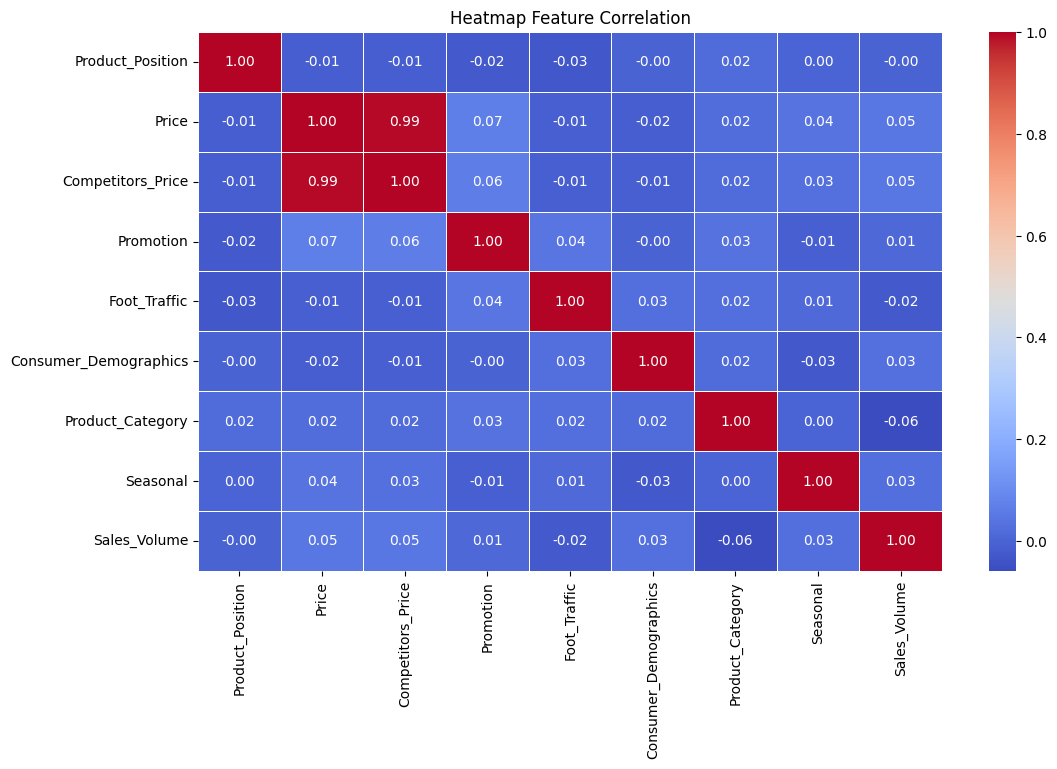

In [ ]:
# itung matriks korelasi
correlation = df_fe.corr()

# nampilin korelasi pake bentuk heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Feature Correlation")
plt.show()

# data_table.DataTable(correlation)

Terlihat bahwa satu-satunya hubungan feature yang cukup kuat dengan volume penjualan produk ialah harga

produknya mau taro dimana juga ga ngaruh sama penjualan dan ga ngaruh juga sama banyaknya orang lalu lalang (foot traffic)

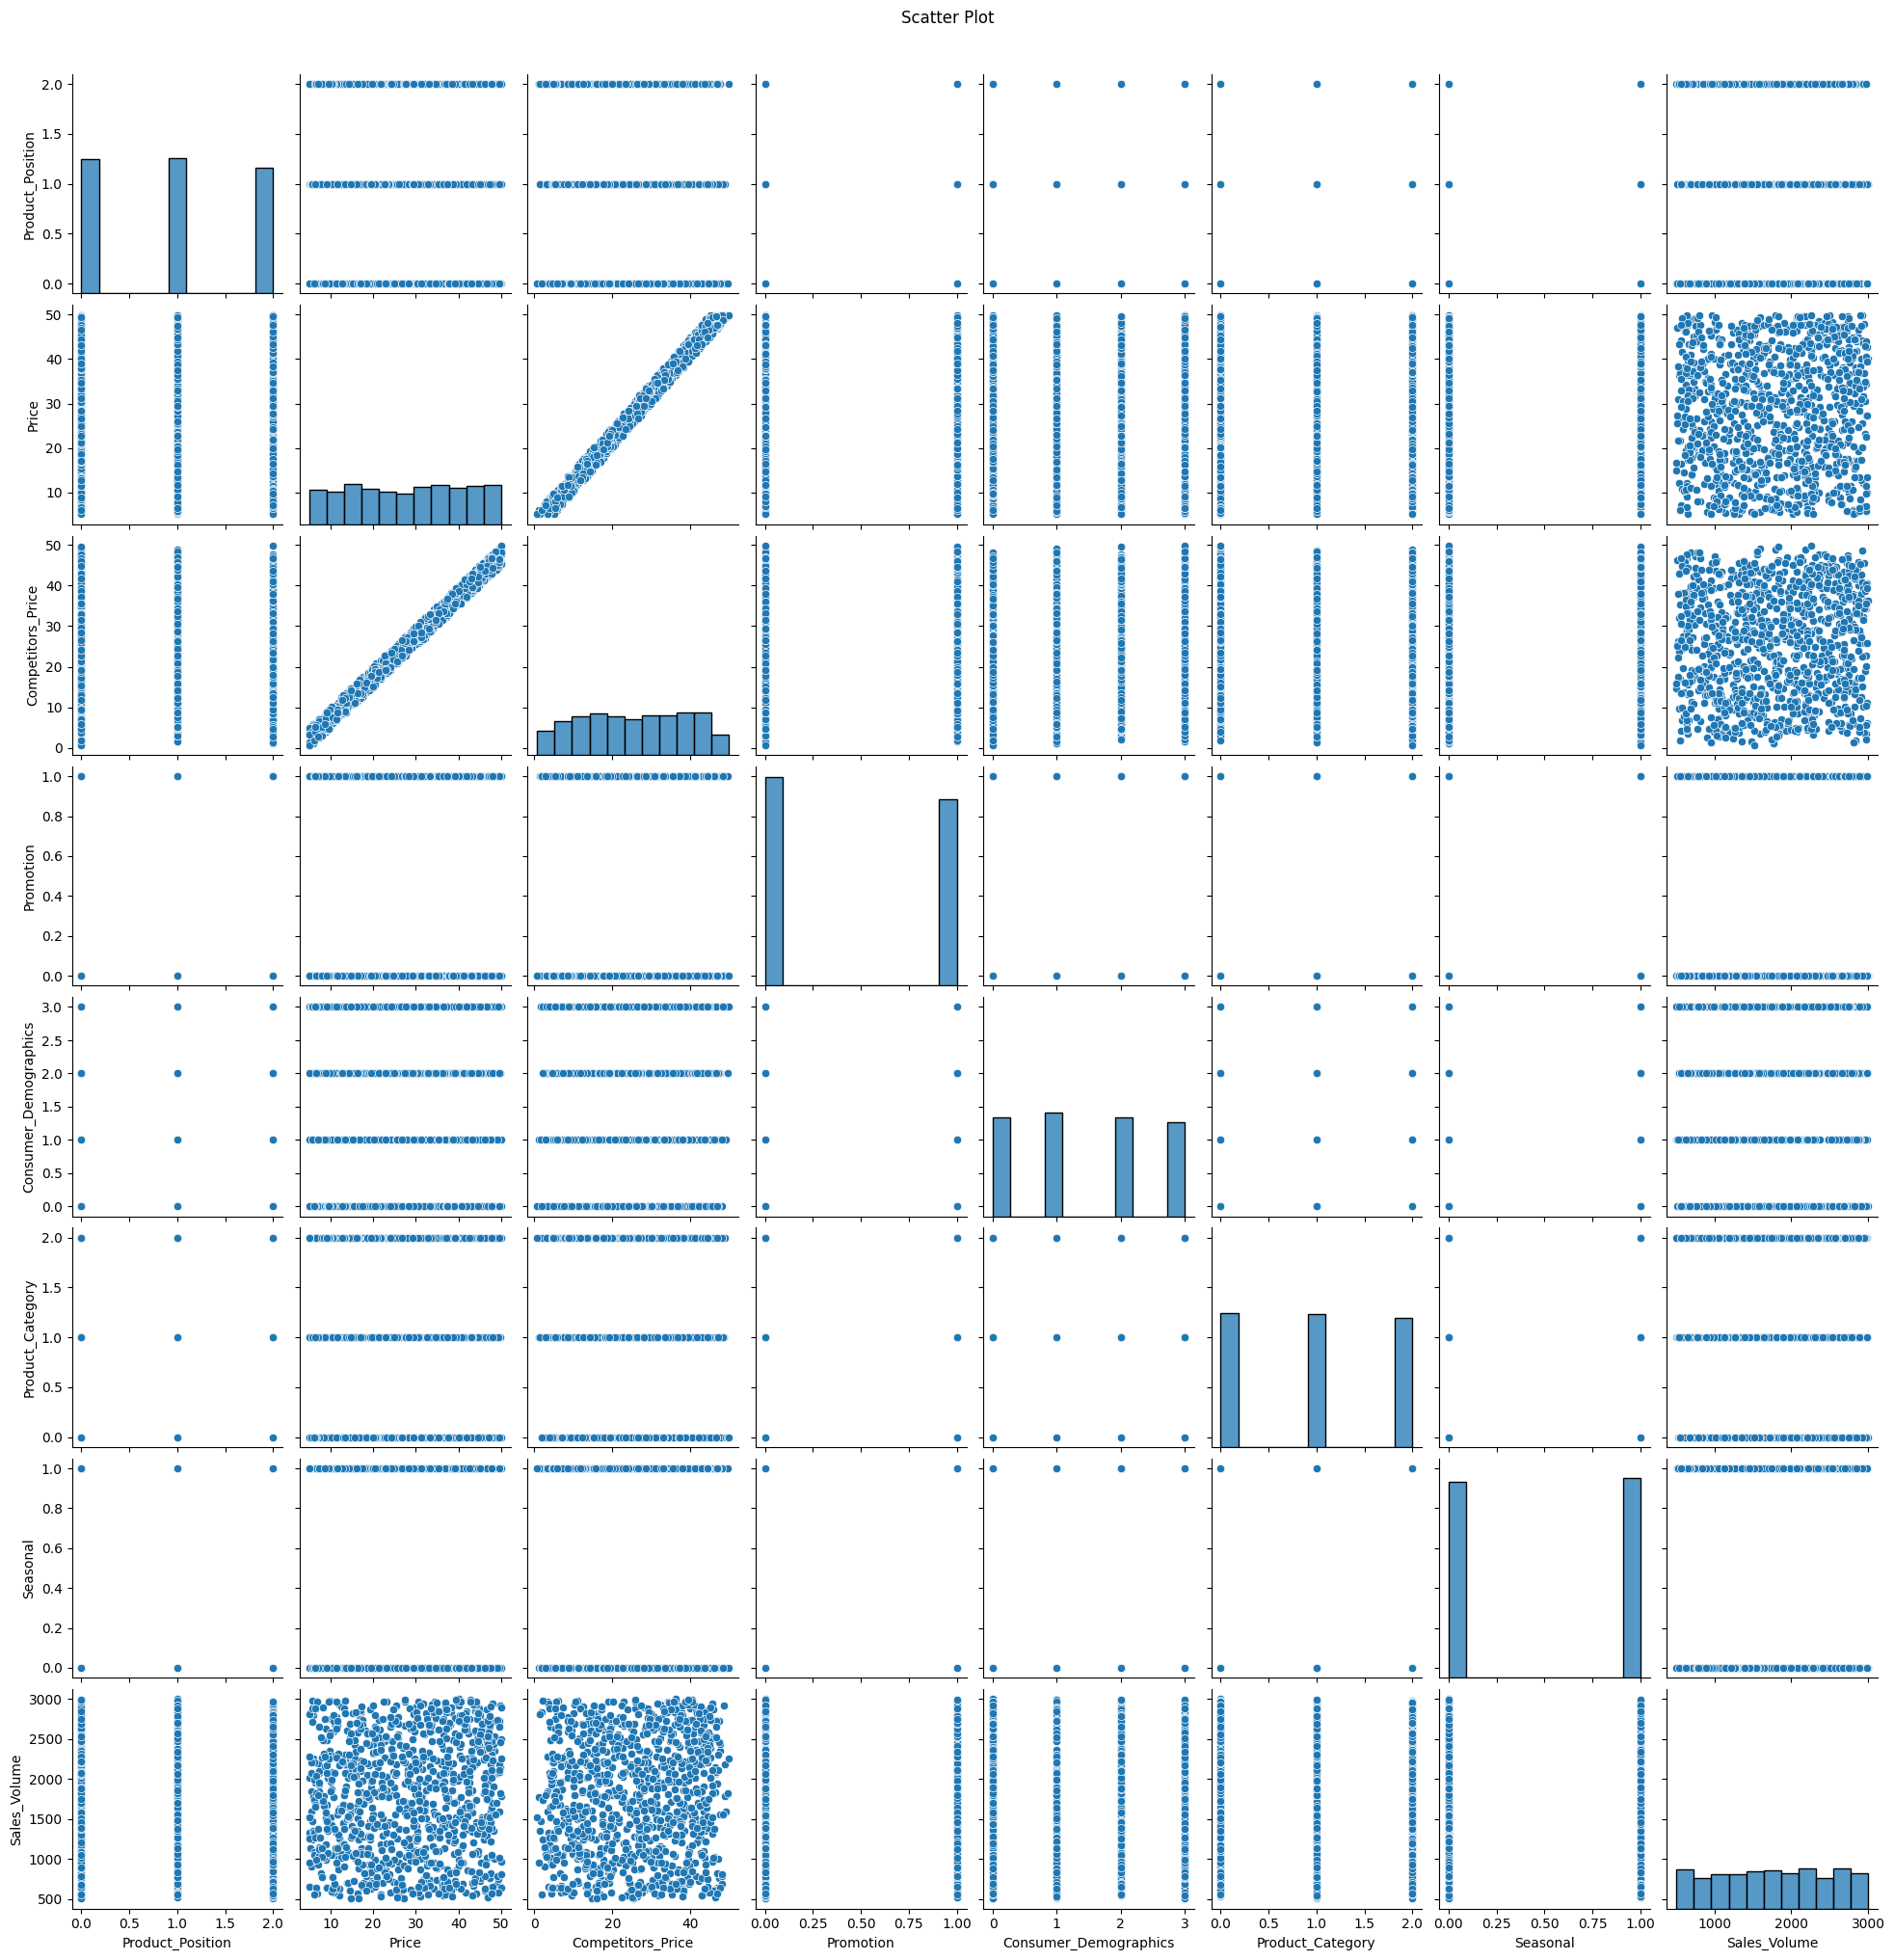

In [ ]:
# Buat pairplot untuk semua pasangan variabel numerik
sns.pairplot(df_fe)
plt.suptitle("Scatter Plot", y=1.02)
plt.show()

###Insight Data Sejauh Ini **(Kesimpulan)**

- **Pembeli kebanyakan mahasiswa (College Student)**
- **Product Category paling banyak kejual baju (Clothing)**
- lebih banyak produk yang ga dipromosiin
- lebih banyak produk musiman
- Posisi barang dimanapun, tetep banyak yang kejual
- Produk yang jarang dilaluin orang (Foot traffic), tetep banyak kejual
- Mau barang musiman atau engga, tetep banyak kejual
- Urutan korelasi dari terkuat sampe terlemah:
 - Harga sama Promosi
 - Harga sama Volume Penjualan
 - Foot Traffic sama Promosi
 - Harga sama Barang Musiman
- Korelasi negatif yang perlu dilihat:
 - Kemungkinan Baju lebih banyak penjualannya
- Harga kita lebih mahal dari kompetitor

### Mungkin coba dibuat model kalau harganya dikurangin (dikasih diskon/promosi), itu penjualan bakal naik atau engga

### Feature Extraction

Pada feature extraction, kita dapat menggabungkan beberapa fitur menjadi satu atau membuat fitur baru lainnya. Disini terdapat penambahan beberapa fitur baru, seperti promosi musiman, produk yang overprice atau underprice, produk yang overprice atau underprice berdasarkan kategori produknya dan persentase perbedaan harga kita dengan harga kompetitor..

In [ ]:
# Untuk melihat apakah produk sedang dalam promosi musiman atau tidak dengan tipe data int 0 dan 1
# 0 = no, 1 = yes
df_fe['Is_Promo_Seasonal'] = df_fe['Promotion'] & df_fe['Seasonal']

# Untuk mendeteksi produk yang mungkin overprice (harga di atas rata-rata) atau underprice (harga di bawah rata-rata) dengan tipe data float
df_fe['Relative_Price'] = df_fe['Price'] - df_fe['Price'].mean()

# Untuk mendeteksi produk yang mungkin overprice (harga di atas rata-rata) atau underprice (harga di bawah rata-rata) dengan tipe data int 0 dan 1
# 0 = no, 1 = yes
df_fe['Is_Overprice'] = (df_fe['Relative_Price'] > 0).astype(int)

# Untuk mendeteksi produk yang mungkin overprice (harga di atas rata-rata) atau underprice (harga di bawah rata-rata) berdasarkan kategori produknya
# dengan tipe data float
avg_price_by_category = df_fe.groupby('Product_Category')['Price'].transform('mean')
df_fe['Relative_Price_By_Category'] = df_fe['Price'] - avg_price_by_category

# Untuk mendeteksi produk yang mungkin overprice (harga di atas rata-rata) atau underprice (harga di bawah rata-rata) berdasarkan kategori produknya
# dengan tipe data int 0 dan 1
# 0 = no, 1 = yes
df_fe['Is_Overprice_By_Category'] = (df_fe['Relative_Price_By_Category'] > 0).astype(int)

# Untuk mengetahui persentase perbedaan antara harga kita dengan harga kompetitor dalam bentuk tipe data float
# Jika hasilnya positif maka harga kita lebih mahal dari harga kompetitor, dan jika hasilnya negatif maka harga kita lebih murah dari harga kompetitor
df_fe['Percentage_Diff'] = ((df_fe['Price'] - df_fe['Competitors_Price']) / df_fe['Competitors_Price']) * 100

In [ ]:
df_fe

Product_Position  Price  Competitors_Price  Promotion Foot_Traffic  \
0                   0  17.07              16.16          0            1   
1                   0  17.41              13.13          0            0   
2                   1  43.16              38.37          1            1   
3                   0  42.26              38.98          1            0   
4                   1  47.94              45.59          0            1   
..                ...    ...                ...        ...          ...   
995                 1  11.56               8.61          0            1   
996                 2  47.72              46.78          0            1   
997                 0  21.30              18.71          1            2   
998                 0  22.82              19.13          0            1   
999                 1   6.38               5.25          1            1   

     Consumer_Demographics  Product_Category  Seasonal  Sales_Volume  \
0                        1                 0         0          2823   
1                        2                 0         0           654   
2                        3                 1         1          2220   
3                        1                 0         1          1568   
4                        0                 0         1          2942   
..                     ...               ...       ...           ...   
995                      1                 1         1          1133   
996                      0                 2         1           565   
997                      2                 1         0           890   
998                      2                 1         1          2538   
999                      3                 1         0          2884   

     Is_Promo_Seasonal  Relative_Price  Is_Overprice  \
0                    0       -10.95001             0   
1                    0       -10.61001             0   
2                    1        15.13999             1   
3                    1        14.23999             1   
4                    0        19.91999             1   
..                 ...             ...           ...   
995                  0       -16.46001             0   
996                  0        19.69999             1   
997                  0        -6.72001             0   
998                  0        -5.20001             0   
999                  0       -21.64001             0   

     Relative_Price_By_Category  Is_Overprice_By_Category  Percentage_Diff  
0                    -10.680000                         0         5.631188  
1                    -10.340000                         0        32.597106  
2                     15.308899                         1        12.483711  
3                     14.510000                         1         8.414572  
4                     20.190000                         1         5.154639  
..                          ...                       ...              ...  
995                  -16.291101                         0        34.262485  
996                   19.245951                         1         2.009406  
997                   -6.551101                         0        13.842865  
998                   -5.031101                         0        19.289075  
999                  -21.471101                         0        21.523810  

[1000 rows x 15 columns]

## **Modelling: Create Model - Muhammad Rizcy**

### Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = df_fe.drop(columns=['Sales_Volume'])
y = df_fe['Sales_Volume']

## Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training model
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

LinearRegression()

## **Modelling: Model Evaluation - Sakanti Dwi Bhanuwati**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_test_pred = model_lr.predict(X_test_scaled)
r2_train = model_lr.score(X_train_scaled, y_train)

# === Evaluasi TESTING ===
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
r2_train

# === Cetak Hasil Evaluasi ===
print(f" R² Score: {r2_test:.4f}")
print(f" Mean Absolute Error (MAE): {mae_test:.2f}")
print(f" Mean Squared Error (MSE): {mse_test:.2f}")
print(f" Root Mean Squared Error (RMS): {rmse_test:.2f}")

 R² Score: -0.02
 Mean Absolute Error (MAE): 601.46
 Mean Squared Error (MSE): 496686.70
 Root Mean Squared Error (RMS): 704.76


Pada model Linier Regression, Data dibagi 80% untuk training dan 20% untuk testing. Target prediksi dalam model ini adalah Sales_Volume, sementara fitur-fitur independen lainnya digunakan sebagai input model. Setelah model dilatih, dilakukan prediksi terhadap data uji, dan hasil prediksi kemudian dievaluasi menggunakan beberapa metrik.

Hasil evaluasi menunjukkan bahwa model menghasilkan R² Score sebesar -0.02, yang berarti model tidak mampu menjelaskan variansi dalam data target. Nilai MAE sebesar 601.45 dan RMSE sebesar 704.76 menunjukkan bahwa kesalahan prediksi cukup tinggi. Hal ini menandakan bahwa meskipun model Linear Regression sudah menggunakan data yang bersih dan telah diskalakan dengan baik, performanya masih sangat terbatas.

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# === Prediksi ===
y_test_pred_rf = model_rf.predict(X_test)

# === Evaluasi TESTING ===
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# === Cetak Hasil Evaluasi ===
print(f" R² Score: {r2_test_rf:.4f}")
print(f" Mean Absolute Error (MAE): {mae_test_rf:.2f}")
print(f" Mean Squared Error (MSE): {mse_test_rf:.2f}")
print(f" Root Mean Squared Error (RMS): {rmse_test_rf:.2f}")

 R² Score: -0.18
 Mean Absolute Error (MAE): 640.95
 Mean Squared Error (MSE): 572251.31
 Root Mean Squared Error (RMS): 756.47


Hasil evaluasi menunjukkan bahwa model Random Forest menghasilkan R² Score sebesar -0.18, yang menandakan bahwa model belum mampu menjelaskan variansi dalam data target secara efektif. Nilai MAE sebesar 640.95 dan RMSE sebesar 756.47 menunjukkan bahwa tingkat kesalahan prediksi cukup tinggi. Meskipun model ini telah diterapkan pada data yang telah dibersihkan dan diskalakan, performa yang dihasilkan masih terbatas, kemungkinan disebabkan oleh kurang relevannya fitur terhadap target atau adanya permasalahan dalam kualitas dataset yang digunakan.

### Decision Tree



In [ ]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# === Prediksi ===
y_test_pred_dt = model_dt.predict(X_test)

# === Evaluasi TESTING ===
mae_test_dt = mean_absolute_error(y_test, y_test_pred_dt)
mse_test_dt = mean_squared_error(y_test, y_test_pred_dt)
rmse_test_dt = np.sqrt(mse_test_dt)
r2_test_dt = r2_score(y_test, y_test_pred_dt)

# === Cetak Hasil Evaluasi ===
print(f" R² Score: {r2_test_dt:.4f}")
print(f" Mean Absolute Error (MAE): {mae_test_dt:.2f}")
print(f" Mean Squared Error (MSE): {mse_test_dt:.2f}")
print(f" Root Mean Squared Error (RMS): {rmse_test_dt:.2f}")

 R² Score: -1.19
 Mean Absolute Error (MAE): 859.09
 Mean Squared Error (MSE): 1060206.97
 Root Mean Squared Error (RMS): 1029.66


Hasil evaluasi menunjukkan bahwa model Decision Tree menghasilkan R² Score sebesar -1.19, yang mengindikasikan performa model sangat buruk bahkan lebih rendah dibandingkan baseline sederhana. Nilai MAE sebesar 859.09 dan RMSE sebesar 1029.66 mengonfirmasi bahwa tingkat kesalahan prediksi sangat tinggi. Meskipun model ini telah diterapkan pada data yang telah dibersihkan dan diskalakan, hasil tersebut menunjukkan bahwa Decision Tree belum mampu menangkap pola yang tepat dalam data, kemungkinan besar karena kualitas fitur yang kurang informatif atau struktur data yang tidak mendukung pembentukan pohon keputusan yang efektif.